Student ID: 16577                                                                                           
Title : Predicting IFC Investment Amounts and Environmental Impact Categories Using Machine Learning Techniques

1. Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
from datetime import datetime

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [14]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

In [15]:
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

2. Load Dataset

In [16]:
df = pd.read_csv("C:/Users/admin/Desktop/Hybrid_ML/Dataset/ifc_investment_services_projects.csv")
df.head()

,Date Disclosed,Project Name,Document Type,Project Number,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date,IFC Approval Date,IFC Invested Date,IFC Signed Date,Project Url
0,03/30/2023,BOP EU Tchad,Summary of Investment Information (AIP Policy ...,45483,Loan,EXPRESS UNION TCHAD,Chad,CHD,Financial Markets,FI-3 - No Impact,Regional Industry - FIG Africa,Active,05/01/2023,NaN,NaN,1.03,NaN,1.03,TD,12/04/2025,06/12/2023,07/17/2024,06/26/2023,https://disclosures.ifc.org/project-detail/SII...
1,12/04/2014,Millicom Tchad SA,Summary of Investment Information (AIP Policy ...,34297,Loan,MOOV AFRICA TCHAD SA,Chad,CHD,Telecommunications and Technology,B - Limited,"TMT, Venture Capital &amp; Funds",Completed,05/27/2014,NaN,NaN,76.06,NaN,76.06,TD,12/04/2025,05/30/2014,08/22/2014,06/06/2014,https://disclosures.ifc.org/project-detail/SII...
2,04/30/2013,Chad Clinic,Summary of Investment Information (AIP Policy ...,32607,Loan,CLINIQUE PROVIDENCE,Chad,CHD,"Health, Education and Life Sciences",B - Limited,Regional Industry - MAS Africa,Active,05/30/2013,NaN,NaN,1.38,NaN,1.38,TD,12/04/2025,05/06/2015,12/30/2015,05/27/2015,https://disclosures.ifc.org/project-detail/SII...
3,04/19/2010,Aubaine Graphic SA Printing Chad,Summary of Proposed Investment (Disclosure Pol...,29084,Loan,Imprimerie Aubaine Graphic,Chad,CHD,Agribusiness and Forestry,B - Limited,Regional Industry - MAS Africa,Completed,05/20/2010,NaN,NaN,2.83,NaN,2.83,TD,12/04/2025,06/28/2010,02/22/2012,06/30/2010,https://disclosures.ifc.org/project-detail/SPI...
4,03/04/2010,Ecobank Chad,Summary of Proposed Investment (Disclosure Pol...,29317,Loan,ECOBANK TCHAD SA,Chad,CHD,Financial Markets,FI,Banking and Capital Markets,Completed,04/05/2010,NaN,NaN,3.08,NaN,3.08,TD,12/04/2025,04/29/2010,03/01/2011,06/29/2010,https://disclosures.ifc.org/project-detail/SPI...


In [17]:
# Shape of dataset
df.shape

# Dataset info
df.info()

# Preview summary statistics
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777 entries, 0 to 6776
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Date Disclosed                                            6777 non-null   object 
 1   Project Name                                              6777 non-null   object 
 2   Document Type                                             6777 non-null   object 
 3   Project Number                                            6777 non-null   int64  
 4   Product Line                                              6497 non-null   object 
 5   Company Name                                              6754 non-null   object 
 6   Country                                                   6777 non-null   object 
 7   IFC Country Code                                          5956 non-null   object 
 8   Industry          

,Date Disclosed,Project Name,Document Type,Project Number,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date,IFC Approval Date,IFC Invested Date,IFC Signed Date,Project Url
count,6777,6777,6777,6777.000000,6497,6754,6777,5956,6777,6777,6777,6777,5885,202.000000,400.000000,4806.000000,2308.00000,6498.000000,6442,6777,6529,6022,6289,6777
unique,4090,6760,2,NaN,4,5134,170,121,10,8,141,6,3250,NaN,NaN,NaN,NaN,NaN,152,1,3443,3906,3688,6777
top,02/05/2010,Nanjing City Commercial Bank,Summary of Investment Information (AIP Policy ...,NaN,Loan,INTERNATIONAL FINANCE CORPORATION,India,IND,Financial Markets,B - Limited,"Global Industry, Financial Markets",Completed,12/22/2023,NaN,NaN,NaN,NaN,NaN,IN,12/04/2025,11/11/2004,12/20/2012,06/30/2022,https://disclosures.ifc.org/project-detail/SII...
freq,12,2,3491,NaN,4453,20,532,532,2565,3037,889,4113,14,NaN,NaN,NaN,NaN,NaN,532,6777,56,8,31,1
mean,NaN,NaN,NaN,34732.320201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.553713,168.177350,50.324370,23.44078,56.071568,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,43526.017163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.631027,316.049388,110.644166,43.19616,132.516219,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,3402.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.020000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,24398.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,8.560000,10.000000,3.05000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,32258.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,30.000000,25.000000,10.00000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,42773.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.210000,100.000000,55.842500,25.00000,54.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
date_cols = ['Date Disclosed', 'Projected Board Date', 'IFC Approval Date',
             'IFC Signed Date', 'IFC Invested Date', 'As of Date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [19]:
df.describe(include='all')

,Date Disclosed,Project Name,Document Type,Project Number,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date,IFC Approval Date,IFC Invested Date,IFC Signed Date,Project Url
count,6777,6777,6777,6777.000000,6497,6754,6777,5956,6777,6777,6777,6777,5885,202.000000,400.000000,4806.000000,2308.00000,6498.000000,6442,6777,6529,6022,6289,6777
unique,NaN,6760,2,NaN,4,5134,170,121,10,8,141,6,NaN,NaN,NaN,NaN,NaN,NaN,152,NaN,NaN,NaN,NaN,6777
top,NaN,Nanjing City Commercial Bank,Summary of Investment Information (AIP Policy ...,NaN,Loan,INTERNATIONAL FINANCE CORPORATION,India,IND,Financial Markets,B - Limited,"Global Industry, Financial Markets",Completed,NaN,NaN,NaN,NaN,NaN,NaN,IN,NaN,NaN,NaN,NaN,https://disclosures.ifc.org/project-detail/SII...
freq,NaN,2,3491,NaN,4453,20,532,532,2565,3037,889,4113,NaN,NaN,NaN,NaN,NaN,NaN,532,NaN,NaN,NaN,NaN,1
mean,2012-05-14 06:16:18.486055680,NaN,NaN,34732.320201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-03 07:42:42.514868224,5.553713,168.177350,50.324370,23.44078,56.071568,NaN,2025-12-04 00:00:00.000000256,2012-01-30 18:34:54.164496896,2012-05-04 17:01:17.715044864,2012-04-04 14:51:36.835745024,NaN
min,1994-10-31 00:00:00,NaN,NaN,3402.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-11-29 00:00:00,0.000000,0.000000,0.000000,0.00000,0.020000,NaN,2025-12-04 00:00:00,1993-11-01 00:00:00,1994-01-28 00:00:00,1993-06-24 00:00:00,NaN
25%,2005-10-31 00:00:00,NaN,NaN,24398.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-05-30 00:00:00,1.000000,8.560000,10.000000,3.05000,10.000000,NaN,2025-12-04 00:00:00,2005-06-15 00:00:00,2005-11-10 00:00:00,2005-09-20 00:00:00,NaN
50%,2012-11-02 00:00:00,NaN,NaN,32258.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-05-16 00:00:00,2.500000,30.000000,25.000000,10.00000,25.000000,NaN,2025-12-04 00:00:00,2012-06-21 00:00:00,2012-11-07 12:00:00,2012-07-30 00:00:00,NaN
75%,2020-02-26 00:00:00,NaN,NaN,42773.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-08 00:00:00,5.210000,100.000000,55.842500,25.00000,54.000000,NaN,2025-12-04 00:00:00,2019-04-04 00:00:00,2019-05-01 12:00:00,2019-06-16 00:00:00,NaN
max,2025-12-03 00:00:00,NaN,NaN,574447.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2026-04-30 00:00:00,100.000000,1500.000000,3115.000000,1003.00000,3115.000000,NaN,2025-12-04 00:00:00,2025-11-26 00:00:00,2025-11-27 00:00:00,2025-11-28 00:00:00,NaN


In [20]:
df.head()

,Date Disclosed,Project Name,Document Type,Project Number,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),WB Country Code,As of Date,IFC Approval Date,IFC Invested Date,IFC Signed Date,Project Url
0,2023-03-30,BOP EU Tchad,Summary of Investment Information (AIP Policy ...,45483,Loan,EXPRESS UNION TCHAD,Chad,CHD,Financial Markets,FI-3 - No Impact,Regional Industry - FIG Africa,Active,2023-05-01,NaN,NaN,1.03,NaN,1.03,TD,2025-12-04,2023-06-12,2024-07-17,2023-06-26,https://disclosures.ifc.org/project-detail/SII...
1,2014-12-04,Millicom Tchad SA,Summary of Investment Information (AIP Policy ...,34297,Loan,MOOV AFRICA TCHAD SA,Chad,CHD,Telecommunications and Technology,B - Limited,"TMT, Venture Capital &amp; Funds",Completed,2014-05-27,NaN,NaN,76.06,NaN,76.06,TD,2025-12-04,2014-05-30,2014-08-22,2014-06-06,https://disclosures.ifc.org/project-detail/SII...
2,2013-04-30,Chad Clinic,Summary of Investment Information (AIP Policy ...,32607,Loan,CLINIQUE PROVIDENCE,Chad,CHD,"Health, Education and Life Sciences",B - Limited,Regional Industry - MAS Africa,Active,2013-05-30,NaN,NaN,1.38,NaN,1.38,TD,2025-12-04,2015-05-06,2015-12-30,2015-05-27,https://disclosures.ifc.org/project-detail/SII...
3,2010-04-19,Aubaine Graphic SA Printing Chad,Summary of Proposed Investment (Disclosure Pol...,29084,Loan,Imprimerie Aubaine Graphic,Chad,CHD,Agribusiness and Forestry,B - Limited,Regional Industry - MAS Africa,Completed,2010-05-20,NaN,NaN,2.83,NaN,2.83,TD,2025-12-04,2010-06-28,2012-02-22,2010-06-30,https://disclosures.ifc.org/project-detail/SPI...
4,2010-03-04,Ecobank Chad,Summary of Proposed Investment (Disclosure Pol...,29317,Loan,ECOBANK TCHAD SA,Chad,CHD,Financial Markets,FI,Banking and Capital Markets,Completed,2010-04-05,NaN,NaN,3.08,NaN,3.08,TD,2025-12-04,2010-04-29,2011-03-01,2010-06-29,https://disclosures.ifc.org/project-detail/SPI...


In [21]:
df.describe()


,Date Disclosed,Project Number,Projected Board Date,IFC investment for Risk Management(Million - USD),IFC investment for Guarantee(Million - USD),IFC investment for Loan(Million - USD),IFC investment for Equity(Million - USD),Total IFC investment as approved by Board(Million - USD),As of Date,IFC Approval Date,IFC Invested Date,IFC Signed Date
count,6777,6777.000000,5885,202.000000,400.000000,4806.000000,2308.00000,6498.000000,6777,6529,6022,6289
mean,2012-05-14 06:16:18.486055680,34732.320201,2014-06-03 07:42:42.514868224,5.553713,168.177350,50.324370,23.44078,56.071568,2025-12-04 00:00:00.000000256,2012-01-30 18:34:54.164496896,2012-05-04 17:01:17.715044864,2012-04-04 14:51:36.835745024
min,1994-10-31 00:00:00,3402.000000,1994-11-29 00:00:00,0.000000,0.000000,0.000000,0.00000,0.020000,2025-12-04 00:00:00,1993-11-01 00:00:00,1994-01-28 00:00:00,1993-06-24 00:00:00
25%,2005-10-31 00:00:00,24398.000000,2008-05-30 00:00:00,1.000000,8.560000,10.000000,3.05000,10.000000,2025-12-04 00:00:00,2005-06-15 00:00:00,2005-11-10 00:00:00,2005-09-20 00:00:00
50%,2012-11-02 00:00:00,32258.000000,2014-05-16 00:00:00,2.500000,30.000000,25.000000,10.00000,25.000000,2025-12-04 00:00:00,2012-06-21 00:00:00,2012-11-07 12:00:00,2012-07-30 00:00:00
75%,2020-02-26 00:00:00,42773.000000,2021-01-08 00:00:00,5.210000,100.000000,55.842500,25.00000,54.000000,2025-12-04 00:00:00,2019-04-04 00:00:00,2019-05-01 12:00:00,2019-06-16 00:00:00
max,2025-12-03 00:00:00,574447.000000,2026-04-30 00:00:00,100.000000,1500.000000,3115.000000,1003.00000,3115.000000,2025-12-04 00:00:00,2025-11-26 00:00:00,2025-11-27 00:00:00,2025-11-28 00:00:00
std,NaN,43526.017163,NaN,11.631027,316.049388,110.644166,43.19616,132.516219,NaN,NaN,NaN,NaN


In [22]:
df.describe(include='object')


,Project Name,Document Type,Product Line,Company Name,Country,IFC Country Code,Industry,Environmental Category,Department,Status,WB Country Code,Project Url
count,6777,6777,6497,6754,6777,5956,6777,6777,6777,6777,6442,6777
unique,6760,2,4,5134,170,121,10,8,141,6,152,6777
top,Nanjing City Commercial Bank,Summary of Investment Information (AIP Policy ...,Loan,INTERNATIONAL FINANCE CORPORATION,India,IND,Financial Markets,B - Limited,"Global Industry, Financial Markets",Completed,IN,https://disclosures.ifc.org/project-detail/SII...
freq,2,3491,4453,20,532,532,2565,3037,889,4113,532,1


In [23]:
date_columns = ['Date Disclosed', 'Projected Board Date', 'IFC Approval Date',
             'IFC Signed Date', 'IFC Invested Date', 'As of Date']
df[date_columns].apply(pd.to_datetime).describe()


,Date Disclosed,Projected Board Date,IFC Approval Date,IFC Signed Date,IFC Invested Date,As of Date
count,6777,5885,6529,6289,6022,6777
mean,2012-05-14 06:16:18.486055680,2014-06-03 07:42:42.514868224,2012-01-30 18:34:54.164496896,2012-04-04 14:51:36.835745024,2012-05-04 17:01:17.715044864,2025-12-04 00:00:00.000000256
min,1994-10-31 00:00:00,1994-11-29 00:00:00,1993-11-01 00:00:00,1993-06-24 00:00:00,1994-01-28 00:00:00,2025-12-04 00:00:00
25%,2005-10-31 00:00:00,2008-05-30 00:00:00,2005-06-15 00:00:00,2005-09-20 00:00:00,2005-11-10 00:00:00,2025-12-04 00:00:00
50%,2012-11-02 00:00:00,2014-05-16 00:00:00,2012-06-21 00:00:00,2012-07-30 00:00:00,2012-11-07 12:00:00,2025-12-04 00:00:00
75%,2020-02-26 00:00:00,2021-01-08 00:00:00,2019-04-04 00:00:00,2019-06-16 00:00:00,2019-05-01 12:00:00,2025-12-04 00:00:00
max,2025-12-03 00:00:00,2026-04-30 00:00:00,2025-11-26 00:00:00,2025-11-28 00:00:00,2025-11-27 00:00:00,2025-12-04 00:00:00


In [24]:
df.isnull().sum().sort_values(ascending=False)


IFC investment for Risk Management(Million - USD)           6575
IFC investment for Guarantee(Million - USD)                 6377
IFC investment for Equity(Million - USD)                    4469
IFC investment for Loan(Million - USD)                      1971
Projected Board Date                                         892
IFC Country Code                                             821
IFC Invested Date                                            755
IFC Signed Date                                              488
WB Country Code                                              335
Product Line                                                 280
Total IFC investment as approved by Board(Million - USD)     279
IFC Approval Date                                            248
Company Name                                                  23
As of Date                                                     0
Date Disclosed                                                 0
Project Name             

C:\Users\admin\AppData\Local\Temp\ipykernel_19736\2013943819.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts, y=missing_counts.index, palette='viridis')


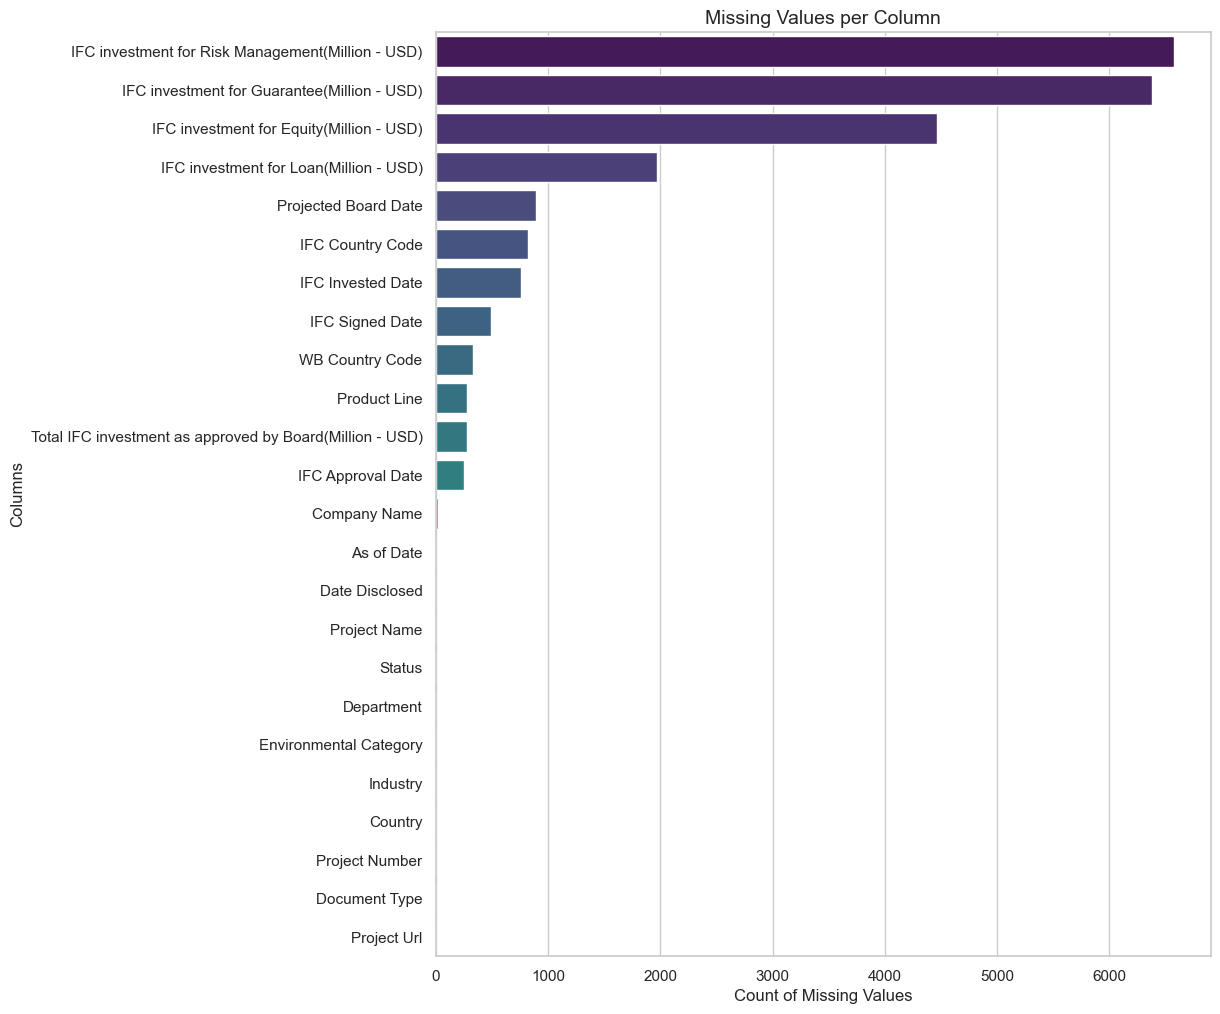

In [25]:
# Missing values count
missing_counts = df.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x=missing_counts, y=missing_counts.index, palette='viridis')
plt.title("Missing Values per Column", fontsize=14)
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.show()


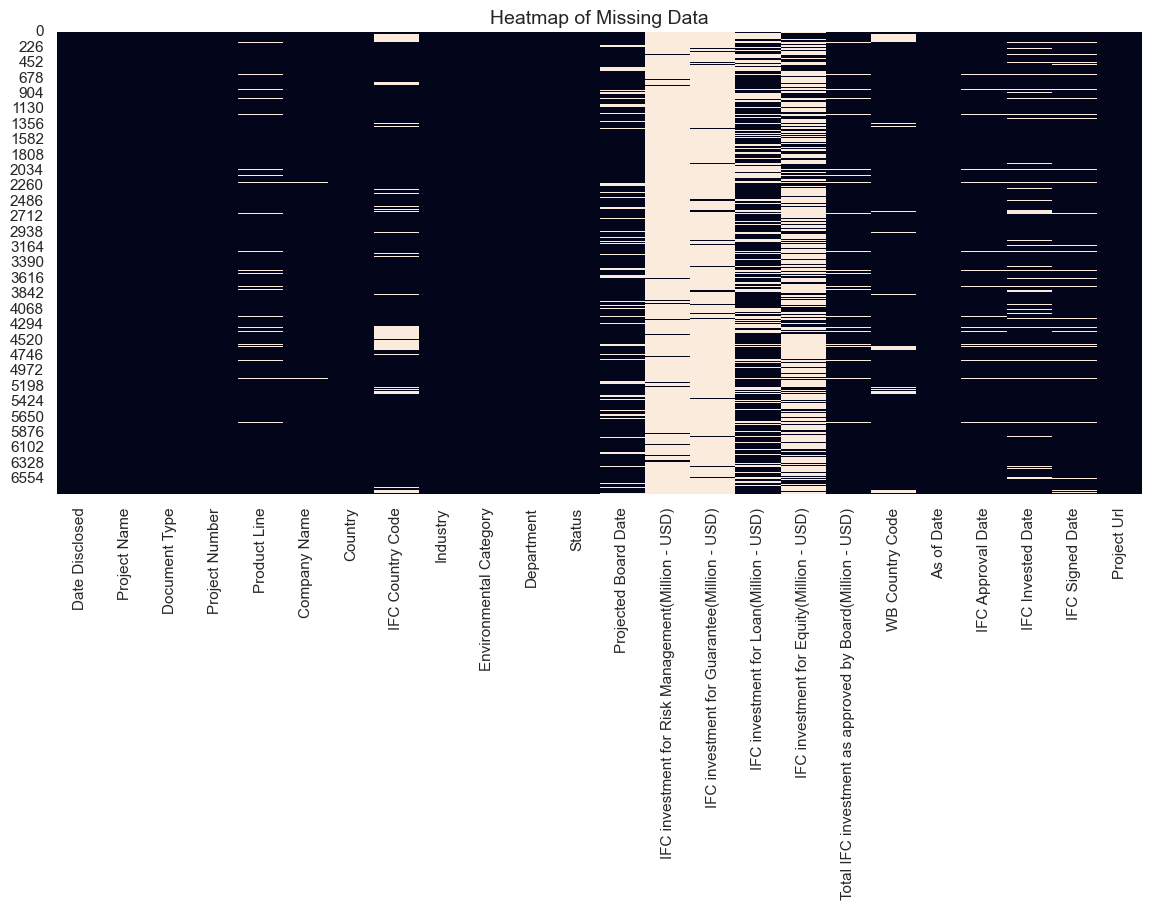

In [26]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Heatmap of Missing Data", fontsize=14)
plt.show()



In [27]:
df.dtypes.value_counts()


object            12
datetime64[ns]     6
float64            5
int64              1
Name: count, dtype: int64

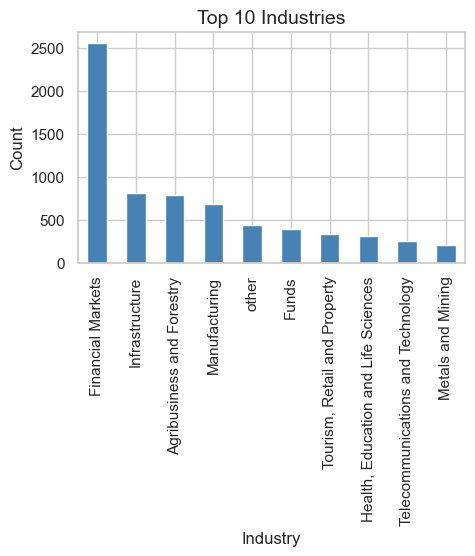

In [28]:
plt.figure(figsize=(5,3))
df['Industry'].value_counts().head(10).plot(kind='bar', color='steelblue')
plt.title("Top 10 Industries", fontsize=14)
plt.ylabel("Count")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_19736\3097533440.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Environmental Category', palette='Set1')


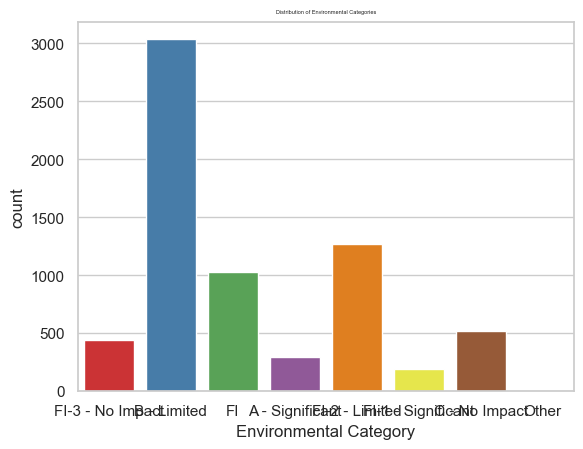

In [29]:
sns.countplot(data=df, x='Environmental Category', palette='Set1')
plt.title("Distribution of Environmental Categories", fontsize=4)
plt.show()


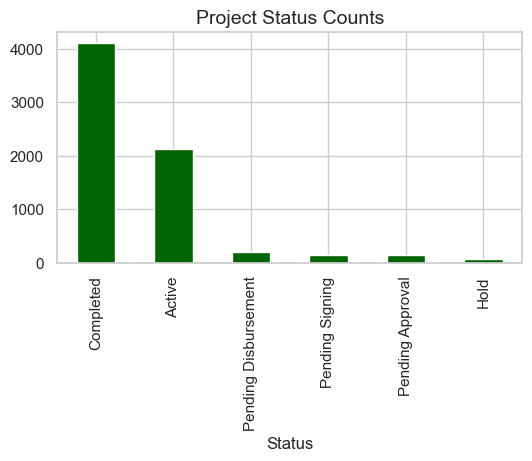

In [30]:
plt.figure(figsize=(6,3))
df['Status'].value_counts().plot(kind='bar', color='darkgreen')
plt.title("Project Status Counts", fontsize=14)
plt.show()


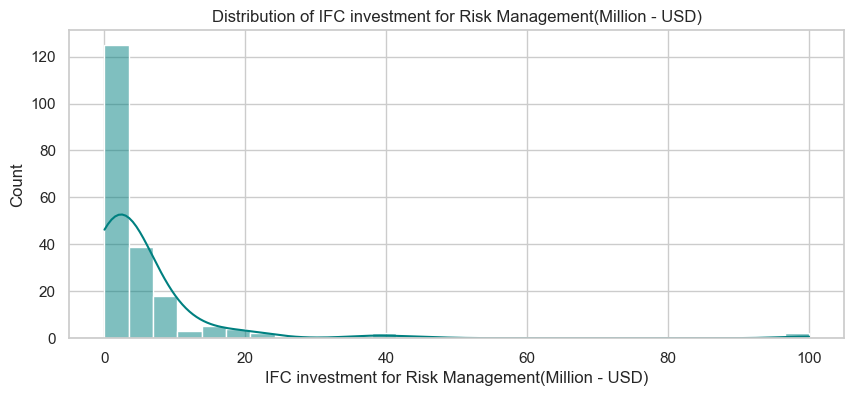

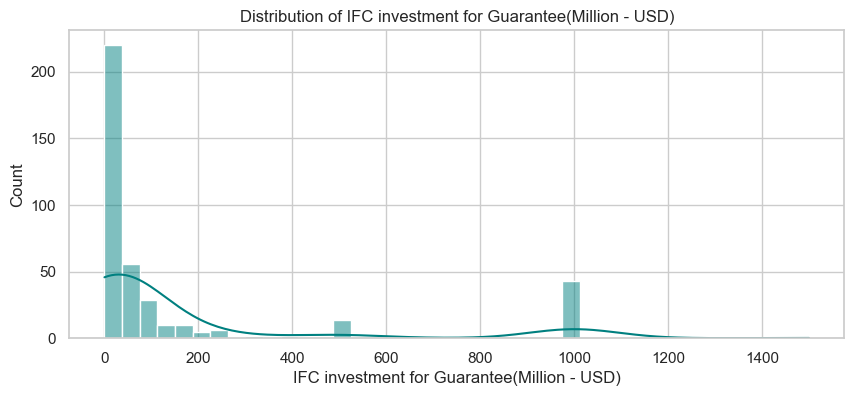

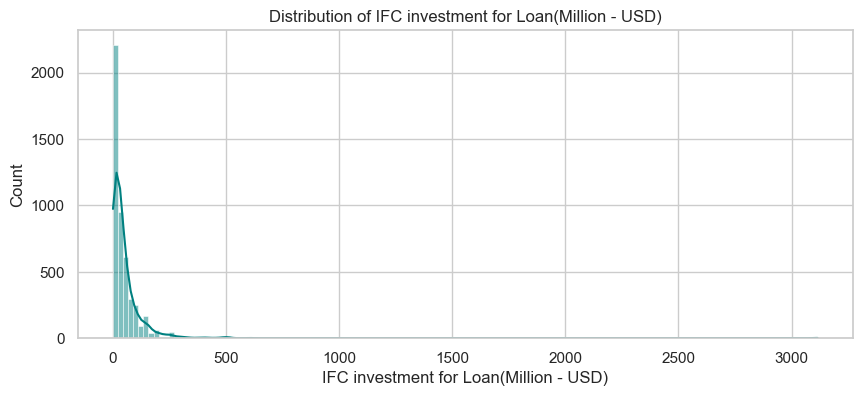

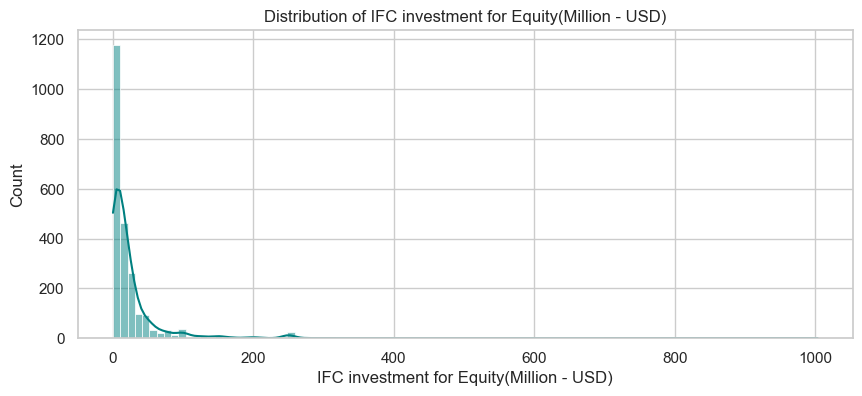

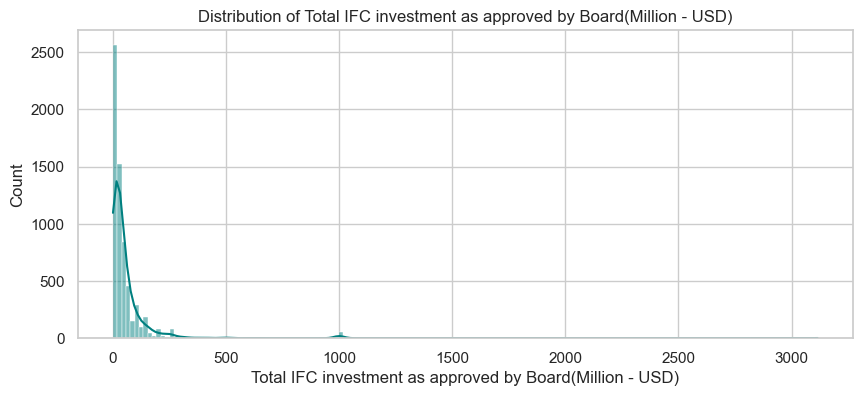

In [31]:
num_cols = [
    'IFC investment for Risk Management(Million - USD)',
    'IFC investment for Guarantee(Million - USD)',
    'IFC investment for Loan(Million - USD)',
    'IFC investment for Equity(Million - USD)',
    'Total IFC investment as approved by Board(Million - USD)'
]

for col in num_cols:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f"Distribution of {col}")
    plt.show()


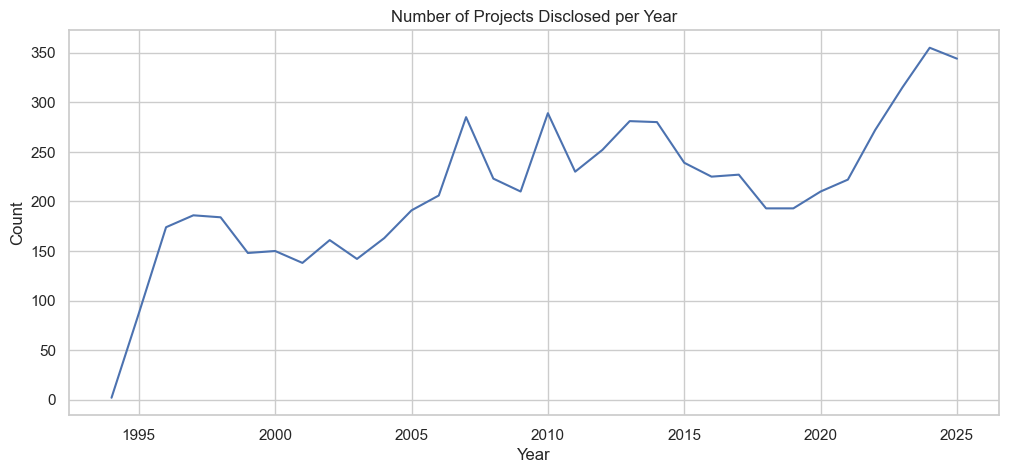

In [32]:
df_temp = df.copy()
date_cols = ['Date Disclosed', 'IFC Approval Date', 'IFC Signed Date', 'IFC Invested Date']

for col in date_cols:
    df_temp[col] = pd.to_datetime(df_temp[col], errors='coerce')

# Yearly trends
df_temp['Year Disclosed'] = df_temp['Date Disclosed'].dt.year

plt.figure(figsize=(12,5))
df_temp['Year Disclosed'].value_counts().sort_index().plot()
plt.title("Number of Projects Disclosed per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


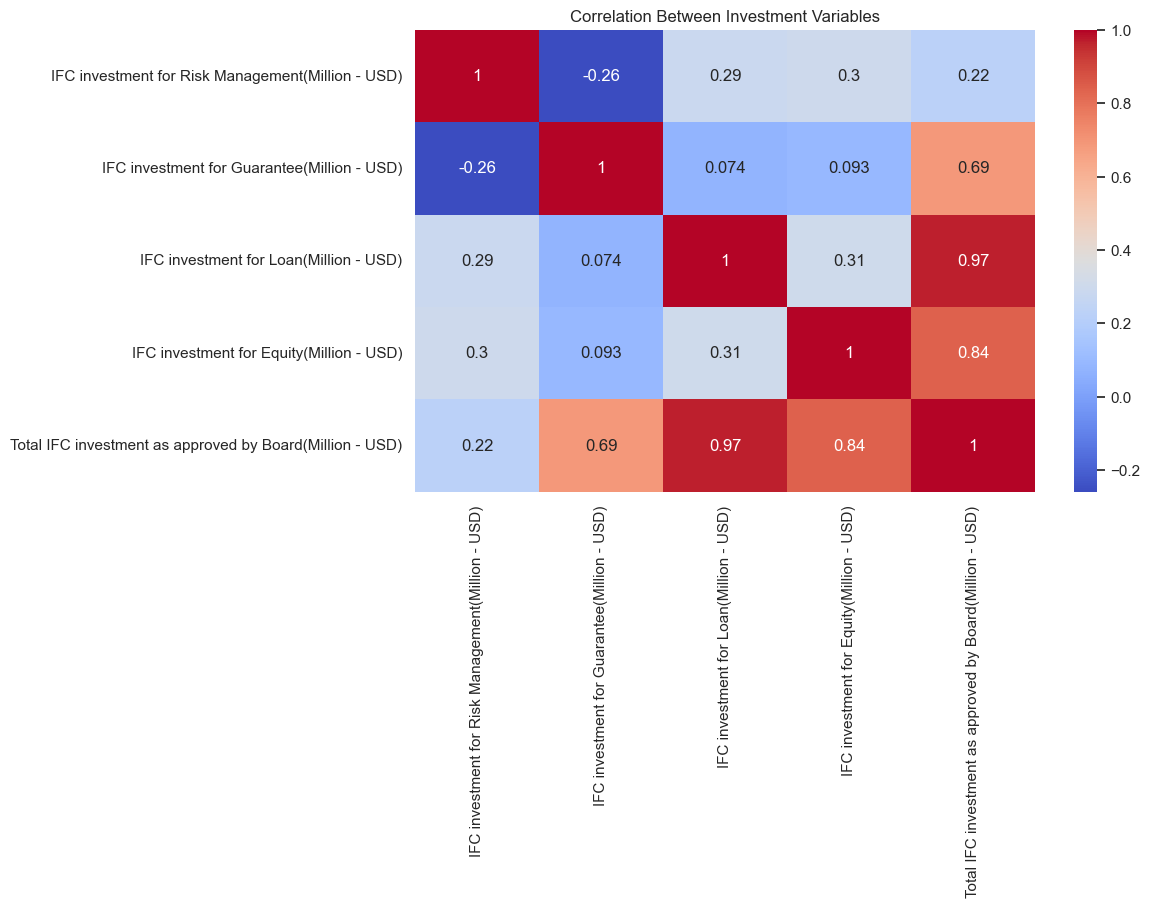

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Investment Variables")
plt.show()


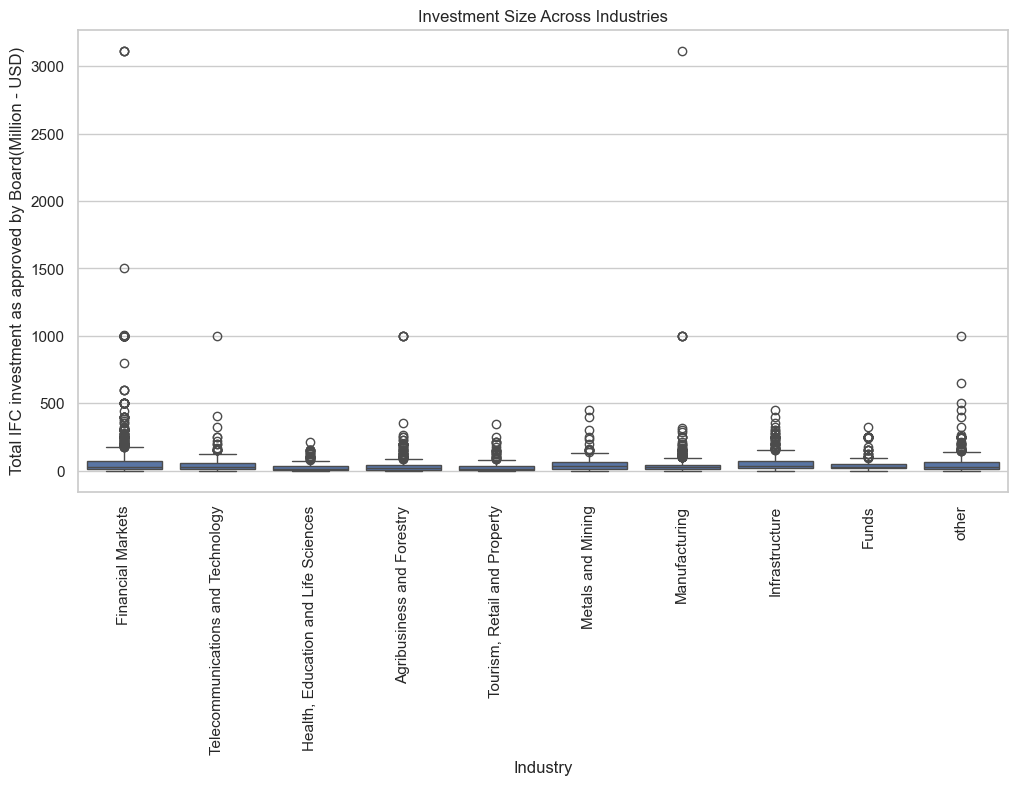

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Industry',
            y='Total IFC investment as approved by Board(Million - USD)')
plt.xticks(rotation=90)
plt.title("Investment Size Across Industries")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_19736\3602386238.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


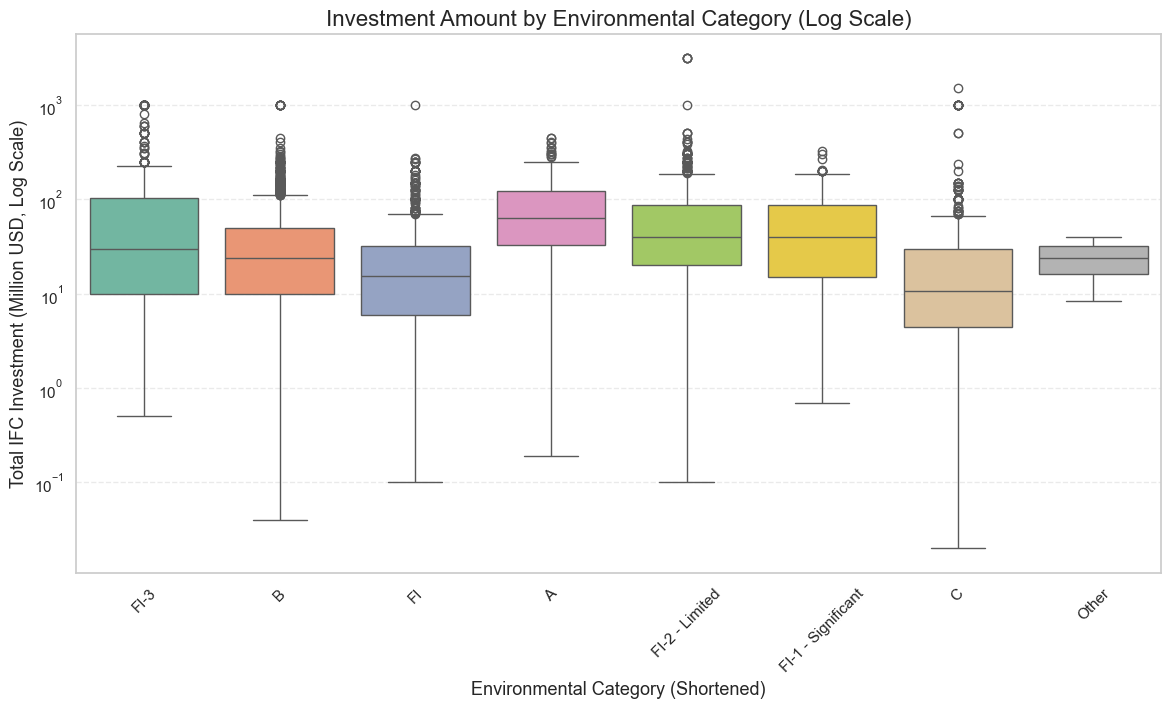

In [35]:
plt.figure(figsize=(14, 7))


df['EnvCatShort'] = df['Environmental Category'].replace({
    'A - Significant': 'A',
    'B - Limited': 'B',
    'C - No Impact': 'C',
    'FI': 'FI',
    'FI-1': 'FI-1',
    'FI-2': 'FI-2',
    'FI-3 - No Impact': 'FI-3',
    'Other': 'Other'
})

sns.boxplot(
    data=df,
    x='EnvCatShort',
    y='Total IFC investment as approved by Board(Million - USD)',
    palette='Set2'
)

plt.yscale('log')   
plt.title("Investment Amount by Environmental Category (Log Scale)", fontsize=16)
plt.xlabel("Environmental Category (Shortened)", fontsize=13)
plt.ylabel("Total IFC Investment (Million USD, Log Scale)", fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()


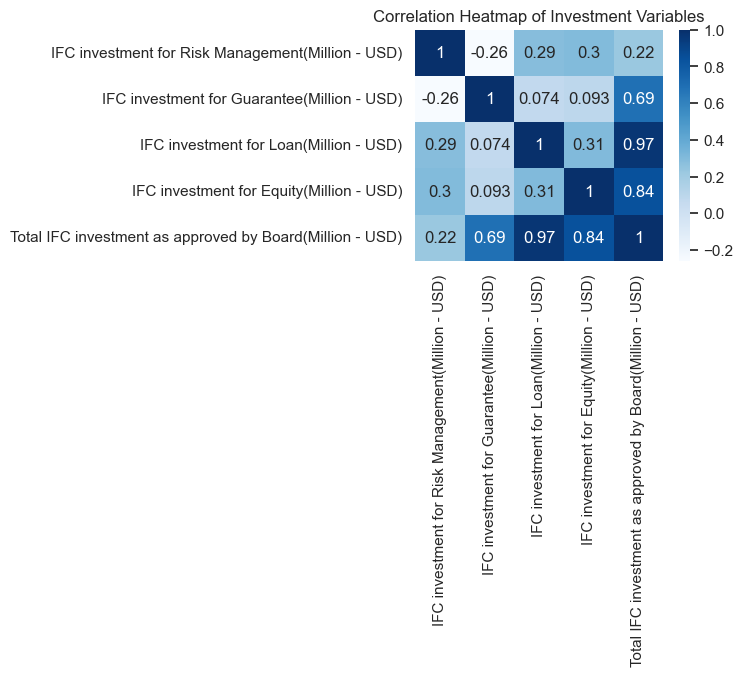

In [36]:
numeric_df = df[num_cols].copy()

plt.figure(figsize=(4, 3))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap of Investment Variables")
plt.show()



C:\Users\admin\AppData\Local\Temp\ipykernel_19736\2148301867.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


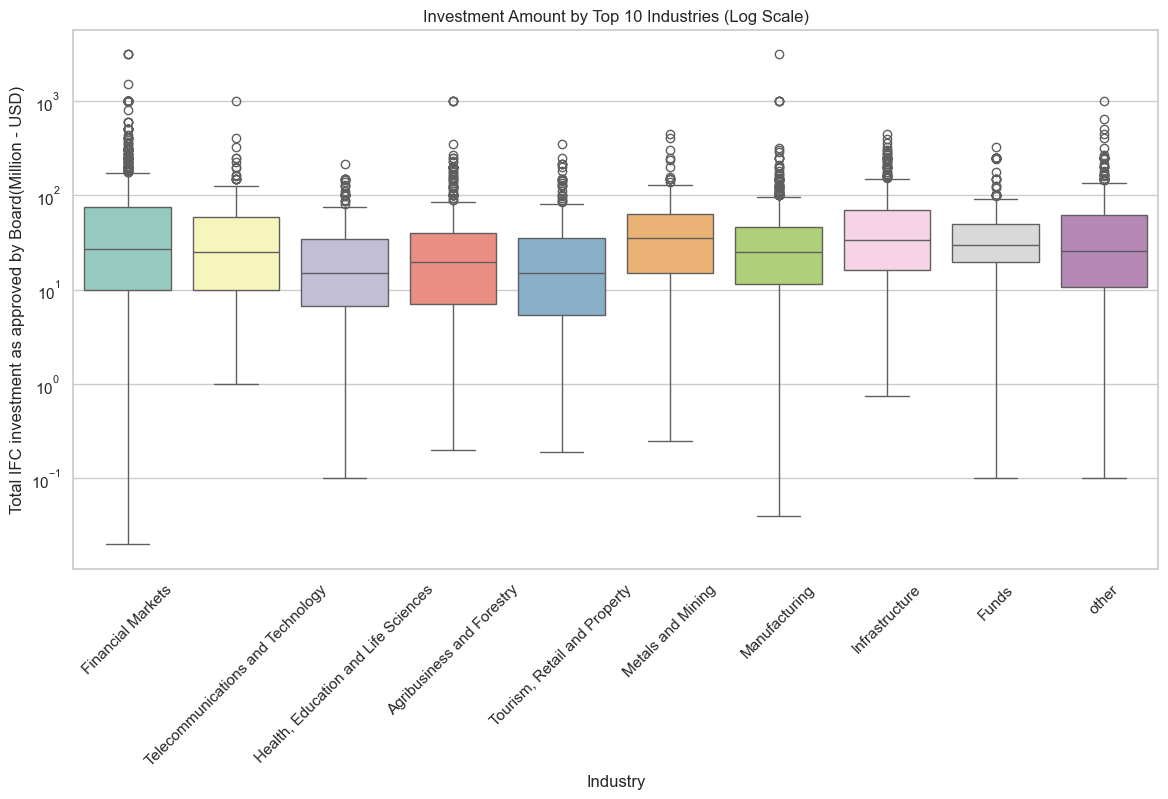

In [37]:
plt.figure(figsize=(14, 7))
top_industries = df['Industry'].value_counts().head(10).index
sns.boxplot(
    data=df[df['Industry'].isin(top_industries)],
    x='Industry',
    y='Total IFC investment as approved by Board(Million - USD)',
    palette='Set3'
)
plt.xticks(rotation=45)
plt.yscale('log')
plt.title("Investment Amount by Top 10 Industries (Log Scale)")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_19736\806113560.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


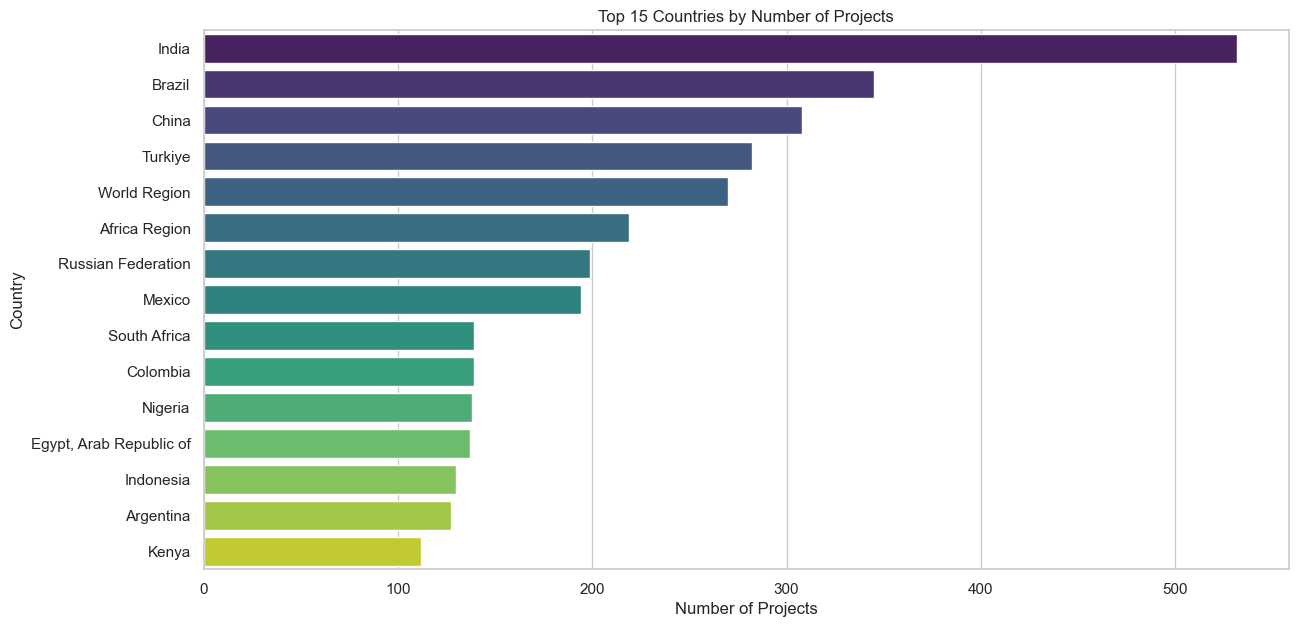

In [38]:
plt.figure(figsize=(14, 7))
top_countries = df['Country'].value_counts().head(15)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 15 Countries by Number of Projects")
plt.xlabel("Number of Projects")
plt.ylabel("Country")
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_19736\3788744815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_investment.values, y=country_investment.index, palette='magma')


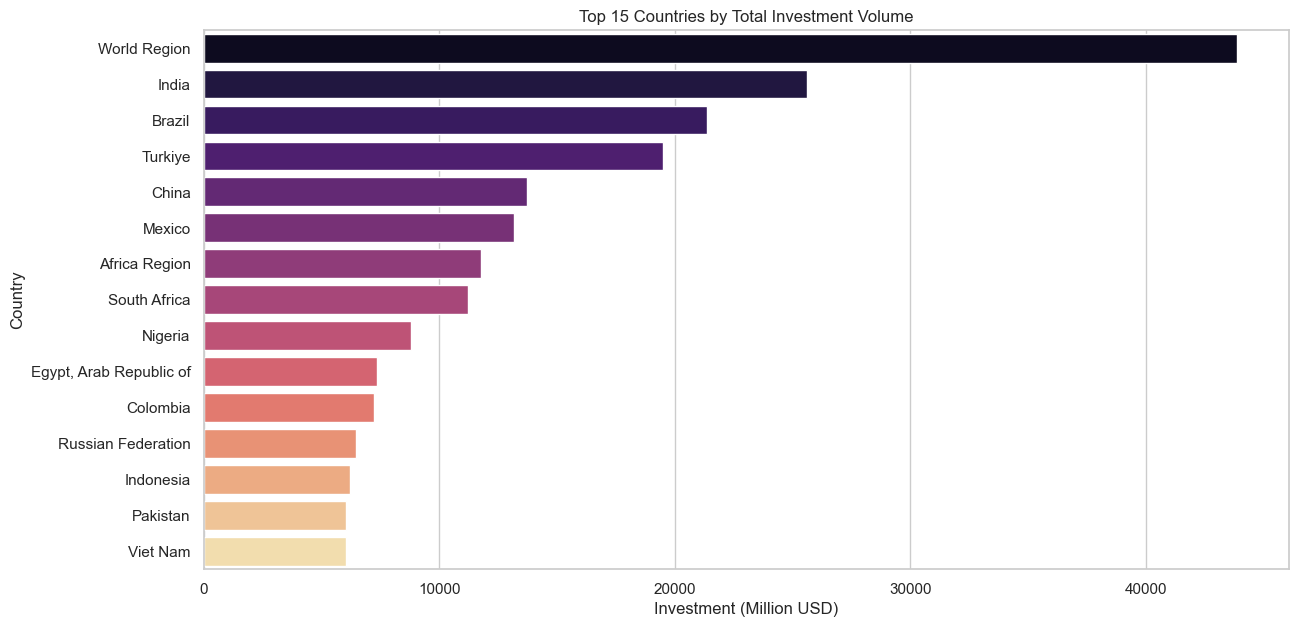

In [39]:
country_investment = df.groupby('Country')['Total IFC investment as approved by Board(Million - USD)'].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 7))
sns.barplot(x=country_investment.values, y=country_investment.index, palette='magma')
plt.title("Top 15 Countries by Total Investment Volume")
plt.xlabel("Investment (Million USD)")
plt.ylabel("Country")
plt.show()


In [40]:
df_dates = df.copy()
df_dates['Date Disclosed'] = pd.to_datetime(df_dates['Date Disclosed'], errors='coerce')
df_dates['Year'] = df_dates['Date Disclosed'].dt.year


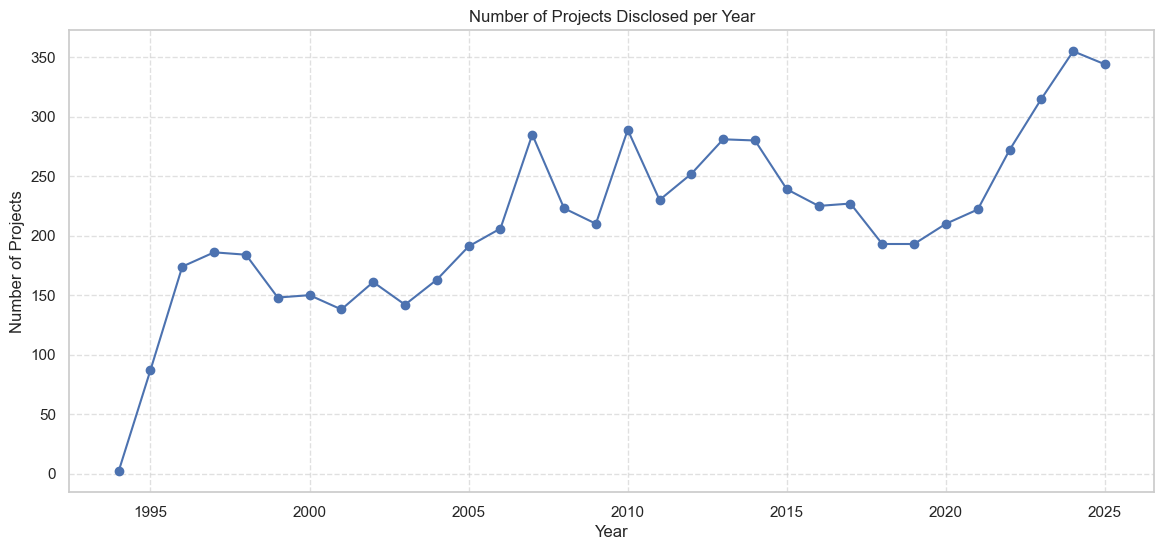

In [41]:
#number of projects
plt.figure(figsize=(14, 6))
df_dates['Year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Number of Projects Disclosed per Year")
plt.xlabel("Year")
plt.ylabel("Number of Projects")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


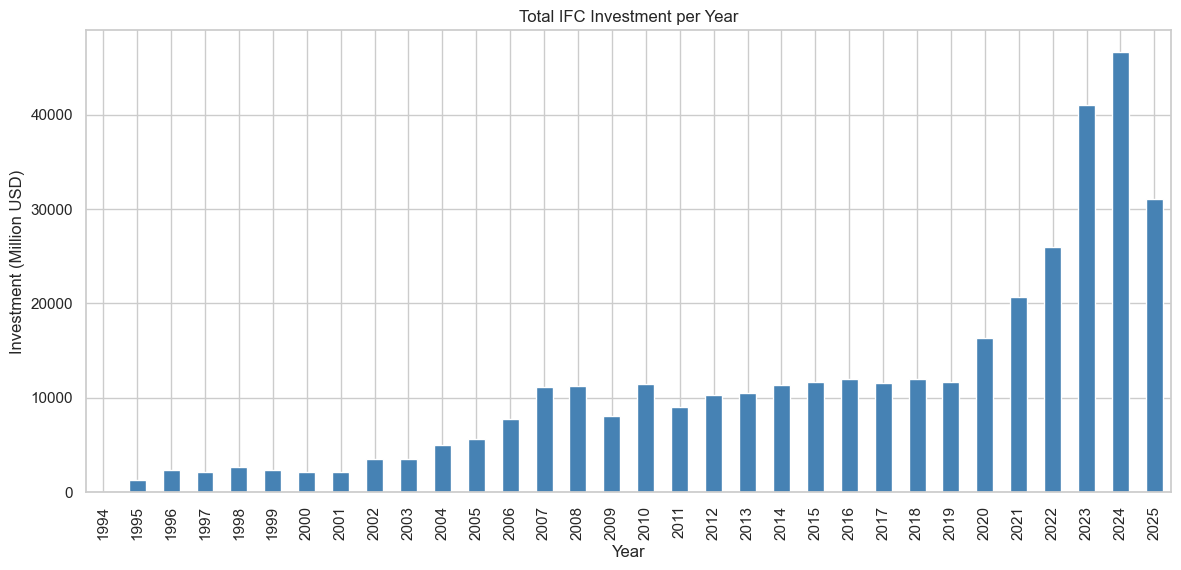

In [42]:
#Total investment
investment_per_year = df_dates.groupby('Year')['Total IFC investment as approved by Board(Million - USD)'].sum()

plt.figure(figsize=(14, 6))
investment_per_year.plot(kind='bar', color='steelblue')
plt.title("Total IFC Investment per Year")
plt.ylabel("Investment (Million USD)")
plt.xlabel("Year")
plt.show()



3. Data Cleaning

In [43]:
cols_to_drop = [
    'Project Name', 'Project Url', 'Company Name', 'Project Number',
    'IFC investment for Risk Management(Million - USD)',
    'IFC investment for Guarantee(Million - USD)'
]

df_clean = df.drop(columns=cols_to_drop)


In [44]:
#Missing Values

In [45]:
investment_cols = [
    'IFC investment for Equity(Million - USD)',
    'IFC investment for Loan(Million - USD)',
    'Total IFC investment as approved by Board(Million - USD)'
]

df_clean[investment_cols] = df_clean[investment_cols].fillna(0)


In [46]:
#Fill mode

In [47]:
cat_cols = df_clean.select_dtypes(include='object').columns

for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])


In [48]:
#Date cols

In [49]:
date_cols = [
    'Date Disclosed', 'Projected Board Date', 'IFC Approval Date',
    'IFC Signed Date', 'IFC Invested Date', 'As of Date'
]

for col in date_cols:
    df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')


In [50]:
#Feature Engineering

In [51]:
df_clean['Year'] = df_clean['Date Disclosed'].dt.year


In [52]:
df_clean['Approval_Delay'] = (df_clean['IFC Approval Date'] - df_clean['Date Disclosed']).dt.days
df_clean['Signing_Delay']  = (df_clean['IFC Signed Date'] - df_clean['IFC Approval Date']).dt.days
df_clean['Invest_Delay']   = (df_clean['IFC Invested Date'] - df_clean['IFC Signed Date']).dt.days


In [53]:
# Nan handling


In [54]:
delay_cols = ['Approval_Delay', 'Signing_Delay', 'Invest_Delay']
for col in delay_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())


In [55]:
df_clean.info()
df_clean.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6777 entries, 0 to 6776
Data columns (total 23 columns):
 #   Column                                                    Non-Null Count  Dtype         
---  ------                                                    --------------  -----         
 0   Date Disclosed                                            6777 non-null   datetime64[ns]
 1   Document Type                                             6777 non-null   object        
 2   Product Line                                              6777 non-null   object        
 3   Country                                                   6777 non-null   object        
 4   IFC Country Code                                          6777 non-null   object        
 5   Industry                                                  6777 non-null   object        
 6   Environmental Category                                    6777 non-null   object        
 7   Department                                

Date Disclosed                                                0
Document Type                                                 0
Product Line                                                  0
Country                                                       0
IFC Country Code                                              0
Industry                                                      0
Environmental Category                                        0
Department                                                    0
Status                                                        0
Projected Board Date                                        892
IFC investment for Loan(Million - USD)                        0
IFC investment for Equity(Million - USD)                      0
Total IFC investment as approved by Board(Million - USD)      0
WB Country Code                                               0
As of Date                                                    0
IFC Approval Date                       

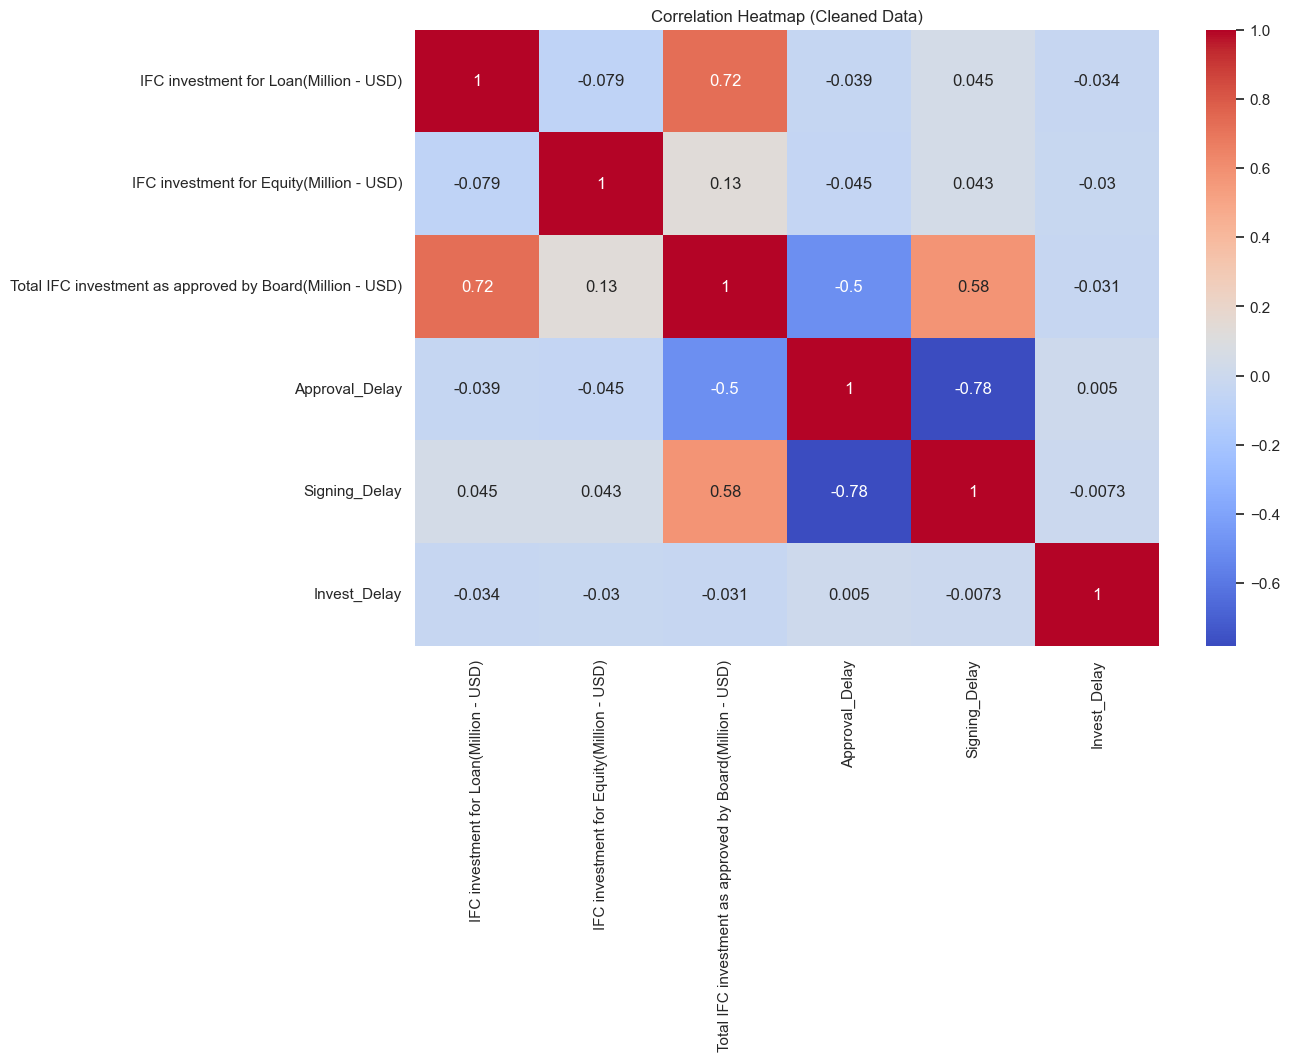

In [56]:
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Cleaned Data)")
plt.show()


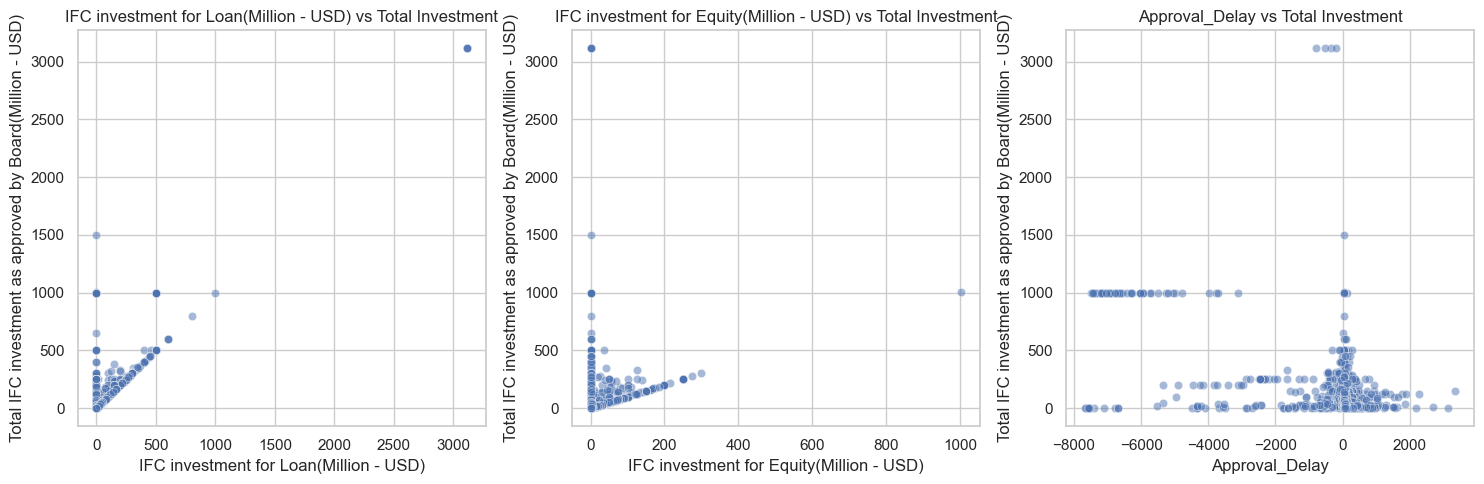

In [57]:
target = 'Total IFC investment as approved by Board(Million - USD)'
important_features = [
    'IFC investment for Loan(Million - USD)',
    'IFC investment for Equity(Million - USD)',
    'Approval_Delay'
]

plt.figure(figsize=(15, 5))
for i, col in enumerate(important_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df_clean, x=col, y=target, alpha=0.5)
    plt.title(f"{col} vs Total Investment")
plt.tight_layout()
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_19736\2752922770.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


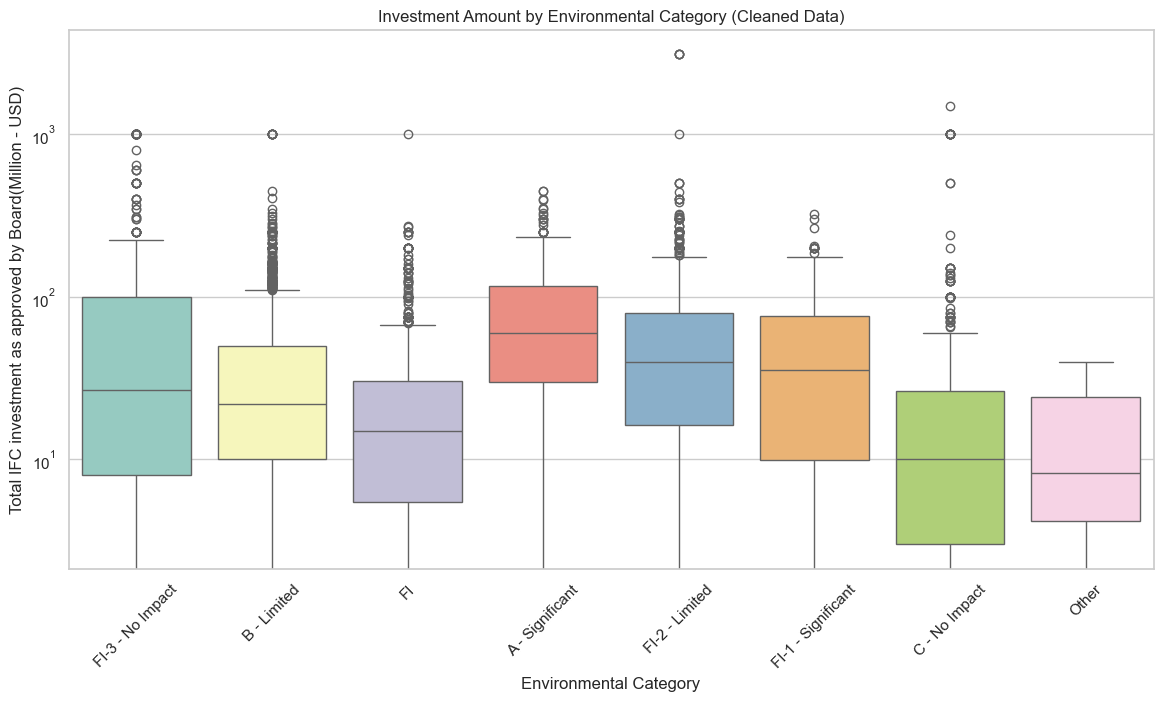

In [58]:
plt.figure(figsize=(14, 7))
sns.boxplot(
    data=df_clean,
    x='Environmental Category',
    y='Total IFC investment as approved by Board(Million - USD)',
    palette='Set3'
)
plt.yscale('log')
plt.title("Investment Amount by Environmental Category (Cleaned Data)")
plt.xticks(rotation=45)
plt.show()


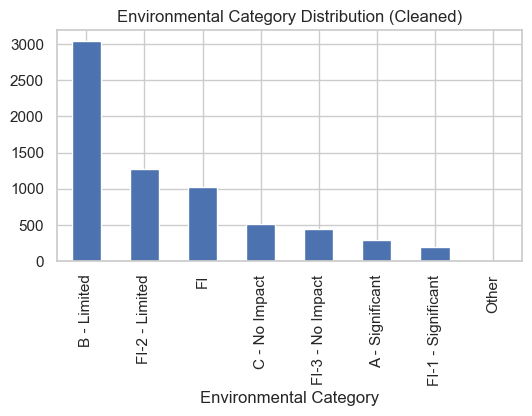

In [59]:
df_clean['Environmental Category'].value_counts().plot(kind='bar', figsize=(6,3))
plt.title("Environmental Category Distribution (Cleaned)")
plt.show()


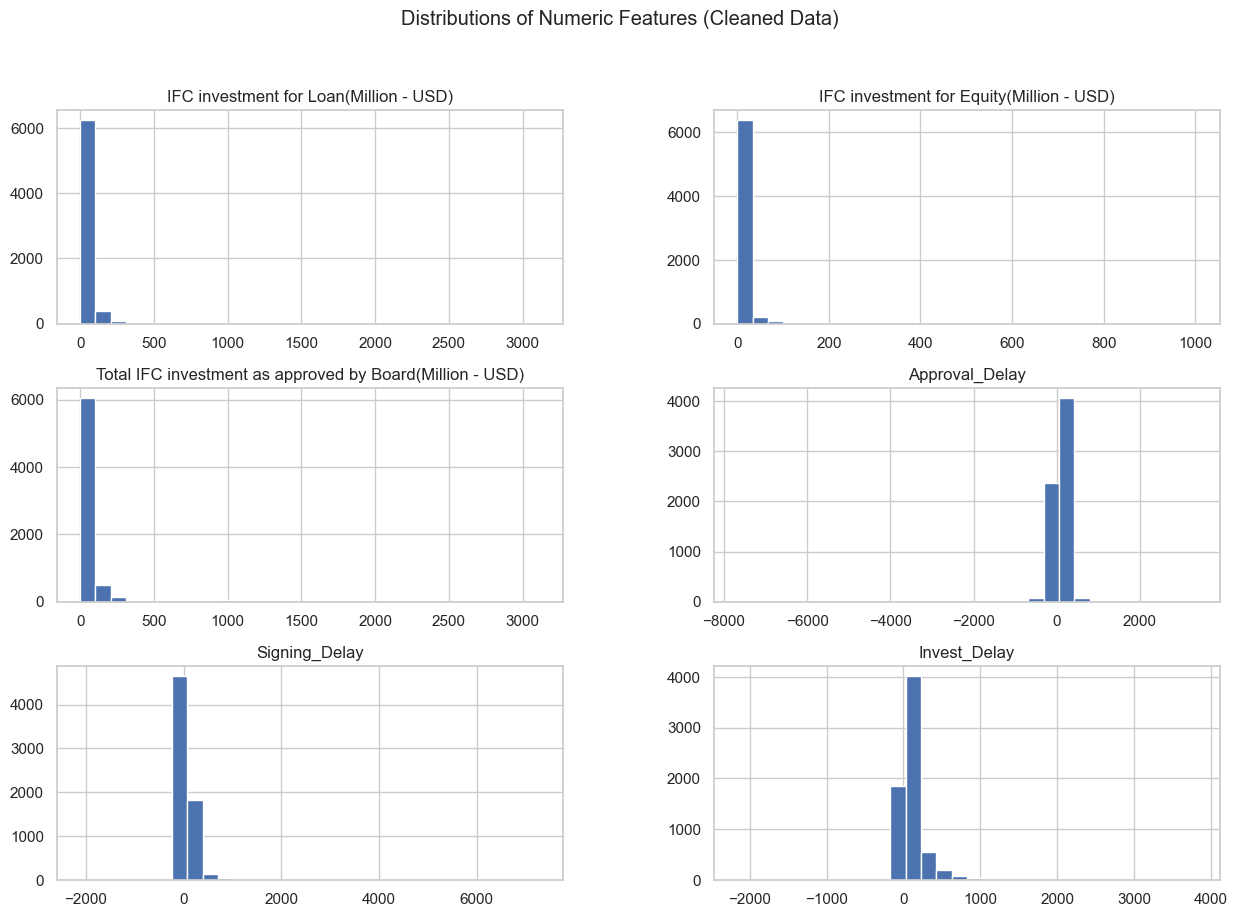

In [60]:
df_clean[numeric_cols].hist(figsize=(15, 10), bins=30)
plt.suptitle("Distributions of Numeric Features (Cleaned Data)")
plt.show()


In [61]:
# Data preproceesing for regression

In [62]:
# Total IFC investment as approved by Board(Million - USD) -target variabale

selected numeric features:                    
IFC investment for Loan(Million - USD)

IFC investment for Equity(Million - USD)

Approval_Delay

Signing_Delay

Invest_Delay

Year

Industry

Environmental Category

Country

IFC Country Code

Department

Document Type

Product Line

Status


In [63]:
target = "Total IFC investment as approved by Board(Million - USD)"

X = df_clean.drop(columns=[target])
y = df_clean[target]


In [64]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

categorical_features = X.select_dtypes(include=['object']).columns.tolist()


In [65]:
numeric_features

['IFC investment for Loan(Million - USD)',
 'IFC investment for Equity(Million - USD)',
 'Approval_Delay',
 'Signing_Delay',
 'Invest_Delay']

In [66]:
categorical_features

['Document Type',
 'Product Line',
 'Country',
 'IFC Country Code',
 'Industry',
 'Environmental Category',
 'Department',
 'Status',
 'WB Country Code',
 'EnvCatShort']

In [67]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Model 1

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

linreg_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

linreg_model.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [71]:
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [72]:
from xgboost import XGBRegressor

xgb_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb_model.fit(X_train, y_train)



,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    return mae, rmse, r2

models = {
    "Linear Regression": linreg_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

for name, model in models.items():
    mae, rmse, r2 = evaluate(model, X_test, y_test)
    print(f"{name}:")
    print(f"  MAE:  {mae:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²:   {r2:.4f}\n")


Linear Regression:
  MAE:  19.5007
  RMSE: 48.0260
  R²:   0.8551

Random Forest:
  MAE:  4.4131
  RMSE: 36.4522
  R²:   0.9165

XGBoost:
  MAE:  5.3171
  RMSE: 32.4578
  R²:   0.9338



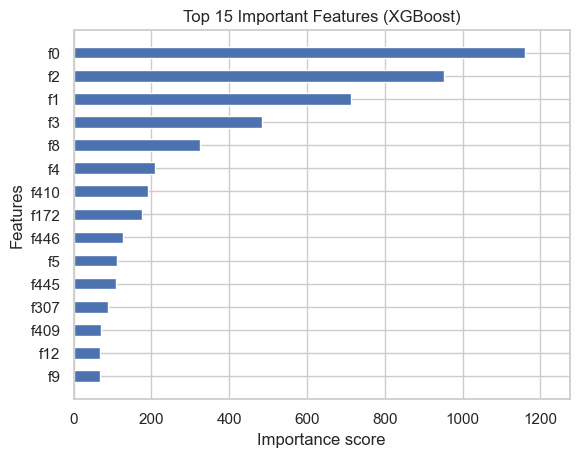

In [74]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Extract the model from pipeline
xgb_core = xgb_model.named_steps['model']

xgb.plot_importance(xgb_core, max_num_features=15, height=0.5, show_values=False)
plt.title("Top 15 Important Features (XGBoost)")
plt.show()


In [75]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    mae  = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2   = r2_score(y_test, preds)
    return mae, rmse, r2

results = []

for name, model in models.items():
    mae, rmse, r2 = evaluate(model, X_test, y_test)
    results.append([name, mae, rmse, r2])

df_results = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
df_results


,Model,MAE,RMSE,R²
0,Linear Regression,19.500711,48.026027,0.855070
1,Random Forest,4.413141,36.452230,0.916506
2,XGBoost,5.317120,32.457773,0.933802


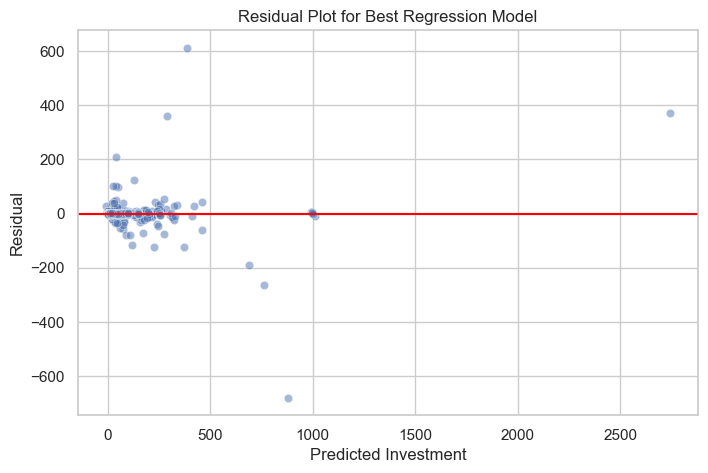

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

best_model = xgb_model  

preds = best_model.predict(X_test)
residuals = y_test - preds

plt.figure(figsize=(8,5))
sns.scatterplot(x=preds, y=residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.title("Residual Plot for Best Regression Model")
plt.xlabel("Predicted Investment")
plt.ylabel("Residual")
plt.show()


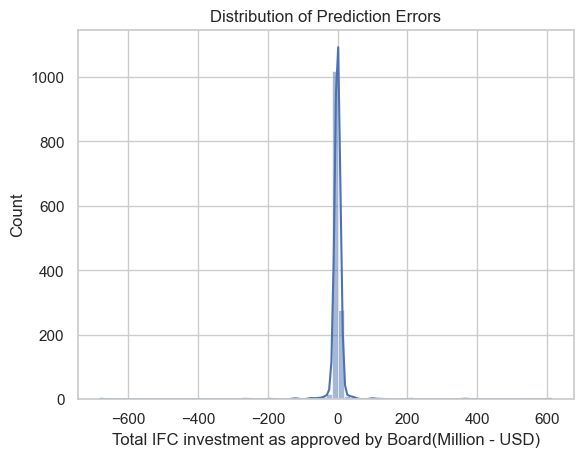

In [77]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Prediction Errors")
plt.show()


In [78]:
#Data Preprocessing for Classification

In [79]:
clf_target = "Environmental Category"


In [80]:
X_clf = df_clean.drop(columns=[clf_target])
y_clf = df_clean[clf_target]


In [81]:
numeric_features_clf = X_clf.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_clf = X_clf.select_dtypes(include=['object']).columns.tolist()


In [82]:
numeric_features_clf
categorical_features_clf

['Document Type',
 'Product Line',
 'Country',
 'IFC Country Code',
 'Industry',
 'Department',
 'Status',
 'WB Country Code',
 'EnvCatShort']

In [83]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_clf_encoded = le.fit_transform(y_clf)


In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

clf_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_clf),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_clf),
    ]
)


In [85]:
from sklearn.model_selection import train_test_split

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf, y_clf_encoded, test_size=0.2, random_state=42, stratify=y_clf_encoded
)


In [86]:
#logistic regression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logreg_model = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', LogisticRegression(max_iter=500, multi_class='ovr'))
])

logreg_model.fit(Xc_train, yc_train)


C:\ProgramData\anaconda3\envs\hybrid_ml_investment\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [88]:
#Random forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])

rf_clf.fit(Xc_train, yc_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [90]:
# Xgboost classifier

In [91]:
from xgboost import XGBClassifier

xgb_clf = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='mlogloss'
    ))
])

xgb_clf.fit(Xc_train, yc_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def evaluate_classifier(model, X_test, y_test):
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_test, preds, average='weighted', zero_division=0)
    return acc, prec, rec, f1



In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(model, X_test, y_test, title):
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


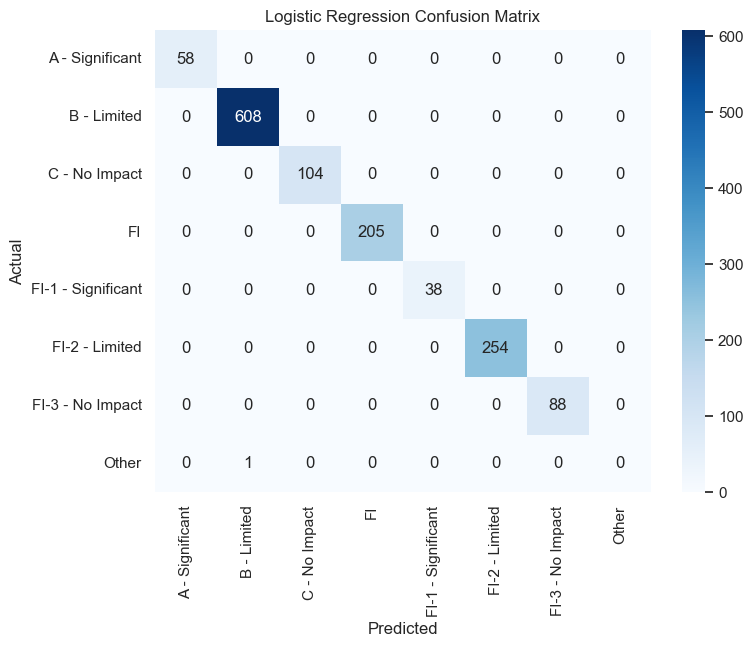

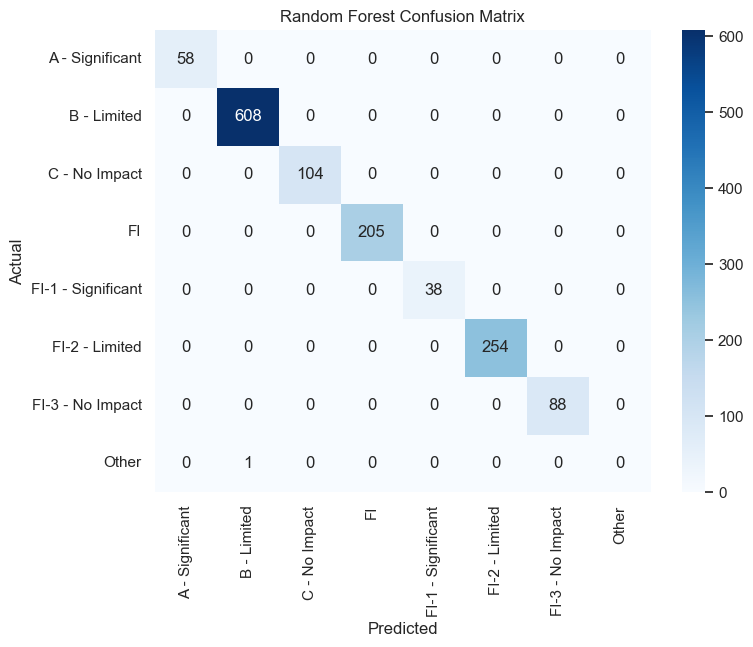

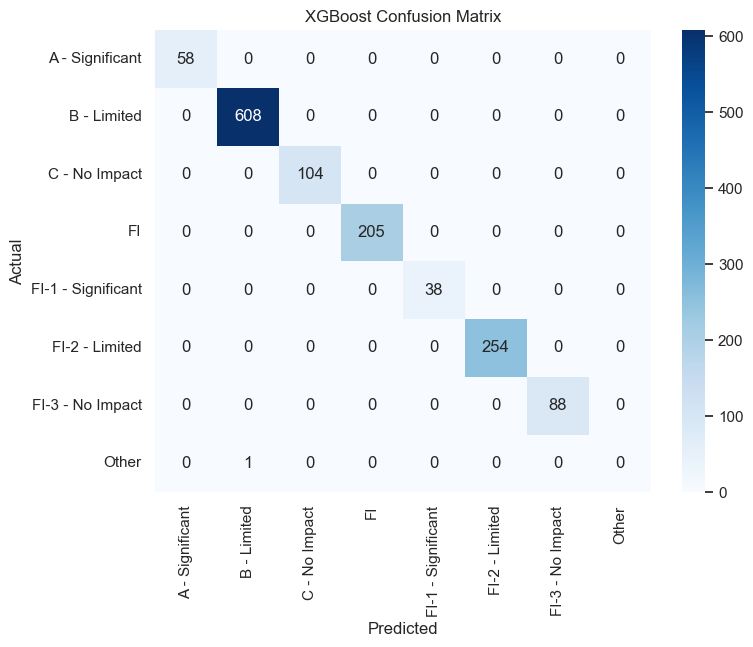

In [94]:
plot_conf_matrix(logreg_model, Xc_test, yc_test, "Logistic Regression Confusion Matrix")
plot_conf_matrix(rf_clf, Xc_test, yc_test, "Random Forest Confusion Matrix")
plot_conf_matrix(xgb_clf, Xc_test, yc_test, "XGBoost Confusion Matrix")


In [95]:
models_clf = {
    "Logistic Regression": logreg_model,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf
}

results_clf = []

for name, model in models_clf.items():
    acc, prec, rec, f1 = evaluate_classifier(model, Xc_test, yc_test)
    results_clf.append([name, acc, prec, rec, f1])

df_results_clf = pd.DataFrame(
    results_clf,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"]
)

df_results_clf



,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.999263,0.998526,0.999263,0.998894
1,Random Forest,0.999263,0.998526,0.999263,0.998894
2,XGBoost,0.999263,0.998526,0.999263,0.998894


In [96]:
df_temp = df_clean.copy()
df_temp["target"] = y_clf_encoded

df_temp.corr(numeric_only=True)["target"].sort_values(ascending=False).head(10)





target                                                      1.000000
Year                                                        0.356529
Total IFC investment as approved by Board(Million - USD)    0.134384
IFC investment for Equity(Million - USD)                    0.106871
Signing_Delay                                               0.098593
IFC investment for Loan(Million - USD)                      0.037757
Invest_Delay                                               -0.120330
Approval_Delay                                             -0.139335
Name: target, dtype: float64

In [97]:
set(X_clf.columns).intersection(set(df_clean["Environmental Category"]))


set()

In [98]:
df_clean.groupby("Environmental Category")[categorical_features_clf].nunique()



,Document Type,Product Line,Country,IFC Country Code,Industry,Department,Status,WB Country Code,EnvCatShort
Environmental Category,,,,,,,,,
A - Significant,2,4,85,72,8,26,6,81,1
B - Limited,2,4,150,112,10,71,6,137,1
C - No Impact,2,4,94,75,10,42,6,82,1
FI,2,4,123,100,10,30,4,113,1
FI-1 - Significant,2,3,67,52,7,29,5,57,1
FI-2 - Limited,2,4,121,99,9,69,6,107,1
FI-3 - No Impact,2,4,94,81,4,39,6,84,1
Other,2,1,3,3,3,3,2,3,1


In [99]:
y_clf.value_counts(normalize=True)


Environmental Category
B - Limited           0.448133
FI-2 - Limited        0.187546
FI                    0.151099
C - No Impact         0.076435
FI-3 - No Impact      0.065073
A - Significant       0.043087
FI-1 - Significant    0.028184
Other                 0.000443
Name: proportion, dtype: float64

In [100]:
df_clean.groupby("Environmental Category")["Industry"].nunique()


Environmental Category
A - Significant        8
B - Limited           10
C - No Impact         10
FI                    10
FI-1 - Significant     7
FI-2 - Limited         9
FI-3 - No Impact       4
Other                  3
Name: Industry, dtype: int64

In [101]:
y_clf.value_counts(normalize=True)


Environmental Category
B - Limited           0.448133
FI-2 - Limited        0.187546
FI                    0.151099
C - No Impact         0.076435
FI-3 - No Impact      0.065073
A - Significant       0.043087
FI-1 - Significant    0.028184
Other                 0.000443
Name: proportion, dtype: float64

In [102]:
df_clean.groupby("Environmental Category")["Industry"].nunique()


Environmental Category
A - Significant        8
B - Limited           10
C - No Impact         10
FI                    10
FI-1 - Significant     7
FI-2 - Limited         9
FI-3 - No Impact       4
Other                  3
Name: Industry, dtype: int64

In [103]:
for col in df_clean.columns:
    if col != "Environmental Category":
        print(col, df_clean.groupby(col)["Environmental Category"].nunique().max())


Date Disclosed 4
Document Type 8
Product Line 8
Country 8
IFC Country Code 8
Industry 8
Department 6
Status 8
Projected Board Date 5
IFC investment for Loan(Million - USD) 8
IFC investment for Equity(Million - USD) 8
Total IFC investment as approved by Board(Million - USD) 8
WB Country Code 8
As of Date 8
IFC Approval Date 5
IFC Invested Date 4
IFC Signed Date 6
EnvCatShort 1
Year 7
Approval_Delay 8
Signing_Delay 8
Invest_Delay 8


In [104]:
# Leakage identified

In [105]:

X_clf = df_clean.drop(columns=["Environmental Category"])
y_clf = df_clean["Environmental Category"]


In [106]:
# Drop the leakage column if it still exists
if 'EnvCatShort' in df_clean.columns:
    df_clean = df_clean.drop(columns=['EnvCatShort'])


In [107]:
clf_target = "Environmental Category"

X_clf = df_clean.drop(columns=[clf_target])
y_clf = df_clean[clf_target]


In [108]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_clf_encoded = le.fit_transform(y_clf)


In [109]:
numeric_features_clf = X_clf.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features_clf = X_clf.select_dtypes(include=['object']).columns.tolist()


In [110]:
numeric_features_clf

['IFC investment for Loan(Million - USD)',
 'IFC investment for Equity(Million - USD)',
 'Total IFC investment as approved by Board(Million - USD)',
 'Approval_Delay',
 'Signing_Delay',
 'Invest_Delay']

In [111]:
numeric_features_clf

['IFC investment for Loan(Million - USD)',
 'IFC investment for Equity(Million - USD)',
 'Total IFC investment as approved by Board(Million - USD)',
 'Approval_Delay',
 'Signing_Delay',
 'Invest_Delay']

In [112]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

clf_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_clf),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_clf),
    ]
)


In [113]:
from sklearn.model_selection import train_test_split

Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X_clf, y_clf_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_clf_encoded
)


In [114]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
logreg_model = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', LogisticRegression(max_iter=500, multi_class='ovr'))
])
logreg_model.fit(Xc_train, yc_train)


C:\ProgramData\anaconda3\envs\hybrid_ml_investment\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [115]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])
rf_clf.fit(Xc_train, yc_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [116]:
from xgboost import XGBClassifier
xgb_clf = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='mlogloss'
    ))
])
xgb_clf.fit(Xc_train, yc_train)




,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [117]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

logreg_model = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', LogisticRegression(max_iter=500, multi_class='ovr'))
])

rf_clf = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight='balanced'
    ))
])

xgb_clf = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='mlogloss'
    ))
])

# Fit all models
logreg_model.fit(Xc_train, yc_train)
rf_clf.fit(Xc_train, yc_train)
xgb_clf.fit(Xc_train, yc_train)


C:\ProgramData\anaconda3\envs\hybrid_ml_investment\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [118]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score
)

def evaluate_classifier(model, X_test, y_test):
    preds = model.predict(X_test)
    acc  = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec  = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1   = f1_score(y_test, preds, average='weighted', zero_division=0)
    return acc, prec, rec, f1

models_clf = {
    "Logistic Regression": logreg_model,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf
}

results_clf = []
for name, model in models_clf.items():
    acc, prec, rec, f1 = evaluate_classifier(model, Xc_test, yc_test)
    results_clf.append([name, acc, prec, rec, f1])

import pandas as pd
df_results_clf = pd.DataFrame(
    results_clf,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"]
)
df_results_clf





,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.777286,0.752152,0.777286,0.727791
1,Random Forest,0.797935,0.776057,0.797935,0.764744
2,XGBoost,0.794985,0.775878,0.794985,0.766277


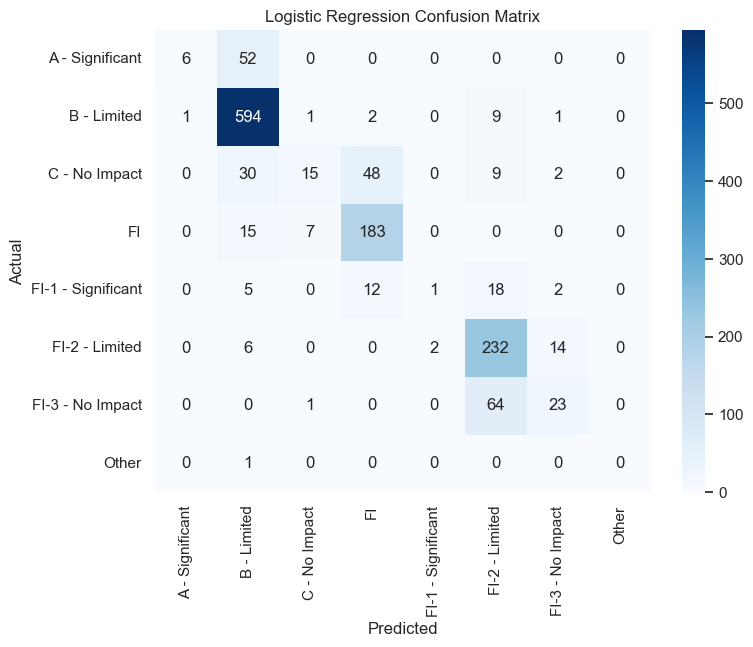

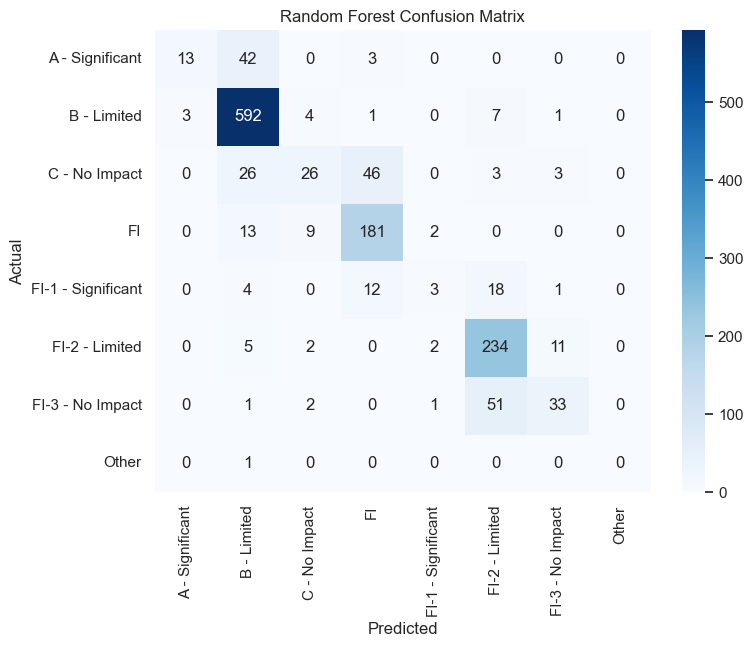

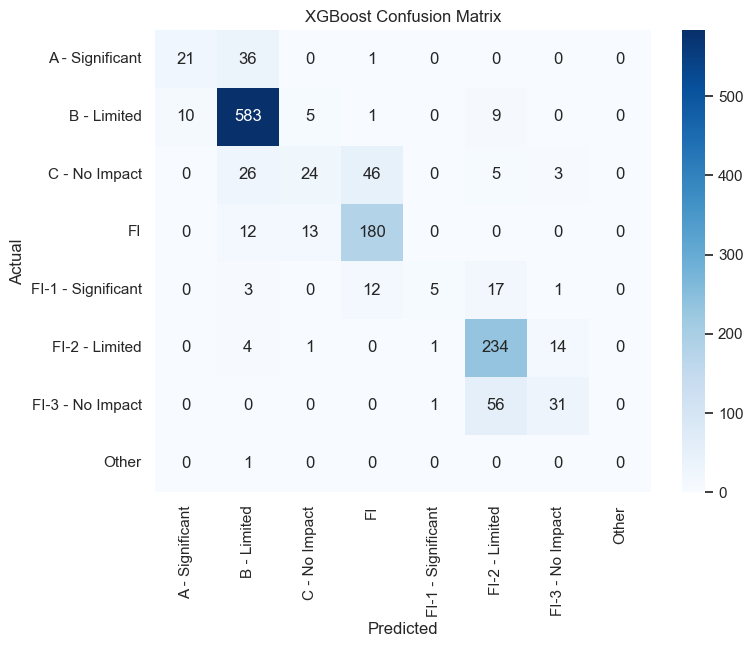

In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(model, X_test, y_test, title):
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_conf_matrix(logreg_model, Xc_test, yc_test, "Logistic Regression Confusion Matrix")
plot_conf_matrix(rf_clf, Xc_test, yc_test, "Random Forest Confusion Matrix")
plot_conf_matrix(xgb_clf, Xc_test, yc_test, "XGBoost Confusion Matrix")



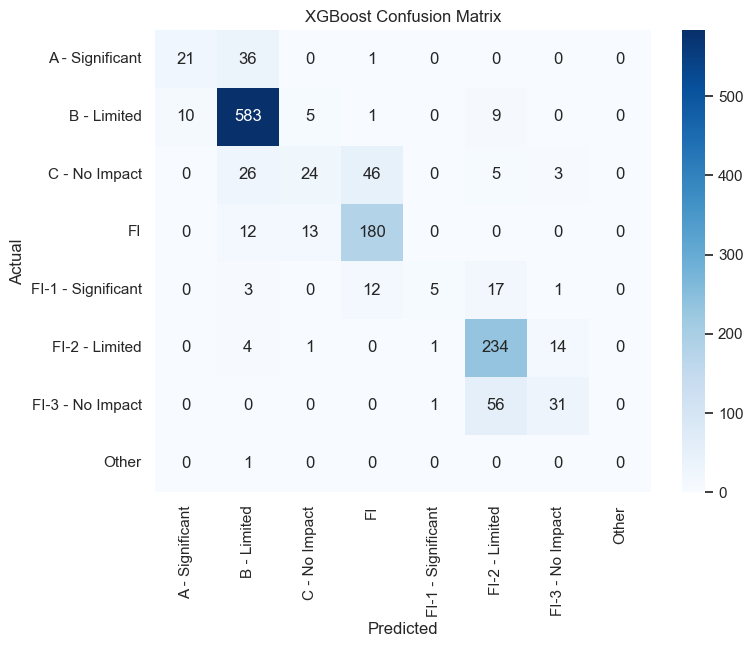

In [120]:
plot_conf_matrix(xgb_clf, Xc_test, yc_test, "XGBoost Confusion Matrix")


In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yc_test, xgb_clf.predict(Xc_test))
print(cm)



[[ 21  36   0   1   0   0   0   0]
 [ 10 583   5   1   0   9   0   0]
 [  0  26  24  46   0   5   3   0]
 [  0  12  13 180   0   0   0   0]
 [  0   3   0  12   5  17   1   0]
 [  0   4   1   0   1 234  14   0]
 [  0   0   0   0   1  56  31   0]
 [  0   1   0   0   0   0   0   0]]


In [122]:
# Hyperparameter tuning


In [123]:

from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_pipe = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        tree_method='hist',     # faster, good default
        random_state=42
    ))
])


In [124]:
from scipy.stats import uniform, randint

param_distributions = {
    'model__n_estimators':    randint(200, 600),        # number of trees
    'model__max_depth':       randint(3, 9),            # tree depth
    'model__learning_rate':   uniform(0.01, 0.15),      # eta
    'model__subsample':       uniform(0.6, 0.4),        # 0.6–1.0
    'model__colsample_bytree':uniform(0.6, 0.4),        # 0.6–1.0
    'model__min_child_weight': randint(1, 6),
    'model__gamma':           uniform(0.0, 0.5)
}


In [125]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

xgb_search = RandomizedSearchCV(
    estimator=xgb_pipe,
    param_distributions=param_distributions,
    n_iter=30,               
    scoring='f1_weighted',
    cv=cv,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


In [126]:
xgb_search.fit(Xc_train, yc_train)

print("Best F1 (cv):", xgb_search.best_score_)
print("Best params:")
for k, v in xgb_search.best_params_.items():
    print(f"  {k}: {v}")


Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\ProgramData\anaconda3\envs\hybrid_ml_investment\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


Best F1 (cv): 0.7611272198321446
Best params:
  model__colsample_bytree: 0.6066351315711425
  model__gamma: 0.2560465291496405
  model__learning_rate: 0.043974366279690695
  model__max_depth: 6
  model__min_child_weight: 1
  model__n_estimators: 327
  model__subsample: 0.8071005402109921


In [127]:
best_xgb_clf = xgb_search.best_estimator_

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classifier(model, X_test, y_test):
    preds = model.predict(X_test)
    acc  = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec  = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1   = f1_score(y_test, preds, average='weighted', zero_division=0)
    return acc, prec, rec, f1

acc, prec, rec, f1 = evaluate_classifier(best_xgb_clf, Xc_test, yc_test)
print("Tuned XGBoost performance on test set:")
print(f"  Accuracy : {acc:.4f}")
print(f"  Precision: {prec:.4f}")
print(f"  Recall   : {rec:.4f}")
print(f"  F1-score : {f1:.4f}")


Tuned XGBoost performance on test set:
  Accuracy : 0.7994
  Precision: 0.7817
  Recall   : 0.7994
  F1-score : 0.7732


In [128]:
# Evaluate base model
base_acc, base_prec, base_rec, base_f1 = evaluate_classifier(xgb_clf, Xc_test, yc_test)

# Evaluate tuned model
tuned_acc, tuned_prec, tuned_rec, tuned_f1 = evaluate_classifier(best_xgb_clf, Xc_test, yc_test)

# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    "Model": ["XGBoost (Base)", "XGBoost (Tuned)"],
    "Accuracy": [base_acc, tuned_acc],
    "Precision": [base_prec, tuned_prec],
    "Recall": [base_rec, tuned_rec],
    "F1-score": [base_f1, tuned_f1]
})

# Display table
comparison_df


,Model,Accuracy,Precision,Recall,F1-score
0,XGBoost (Base),0.794985,0.775878,0.794985,0.766277
1,XGBoost (Tuned),0.799410,0.781675,0.799410,0.773176


In [129]:
# Transform train data using the same preprocessing pipeline used in XGBoost
Xc_train_transformed = clf_preprocessor.fit_transform(Xc_train)



In [130]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=4,           # small depth → readable tree
    random_state=42
)

dt_model.fit(Xc_train_transformed, yc_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [131]:
import numpy as np

# numeric features first
numeric_names = numeric_features_clf

# one-hot-encoded categorical features
ohe = clf_preprocessor.named_transformers_['cat']
categorical_names = ohe.get_feature_names_out(categorical_features_clf)

# combined feature names
all_feature_names = np.concatenate([numeric_names, categorical_names])


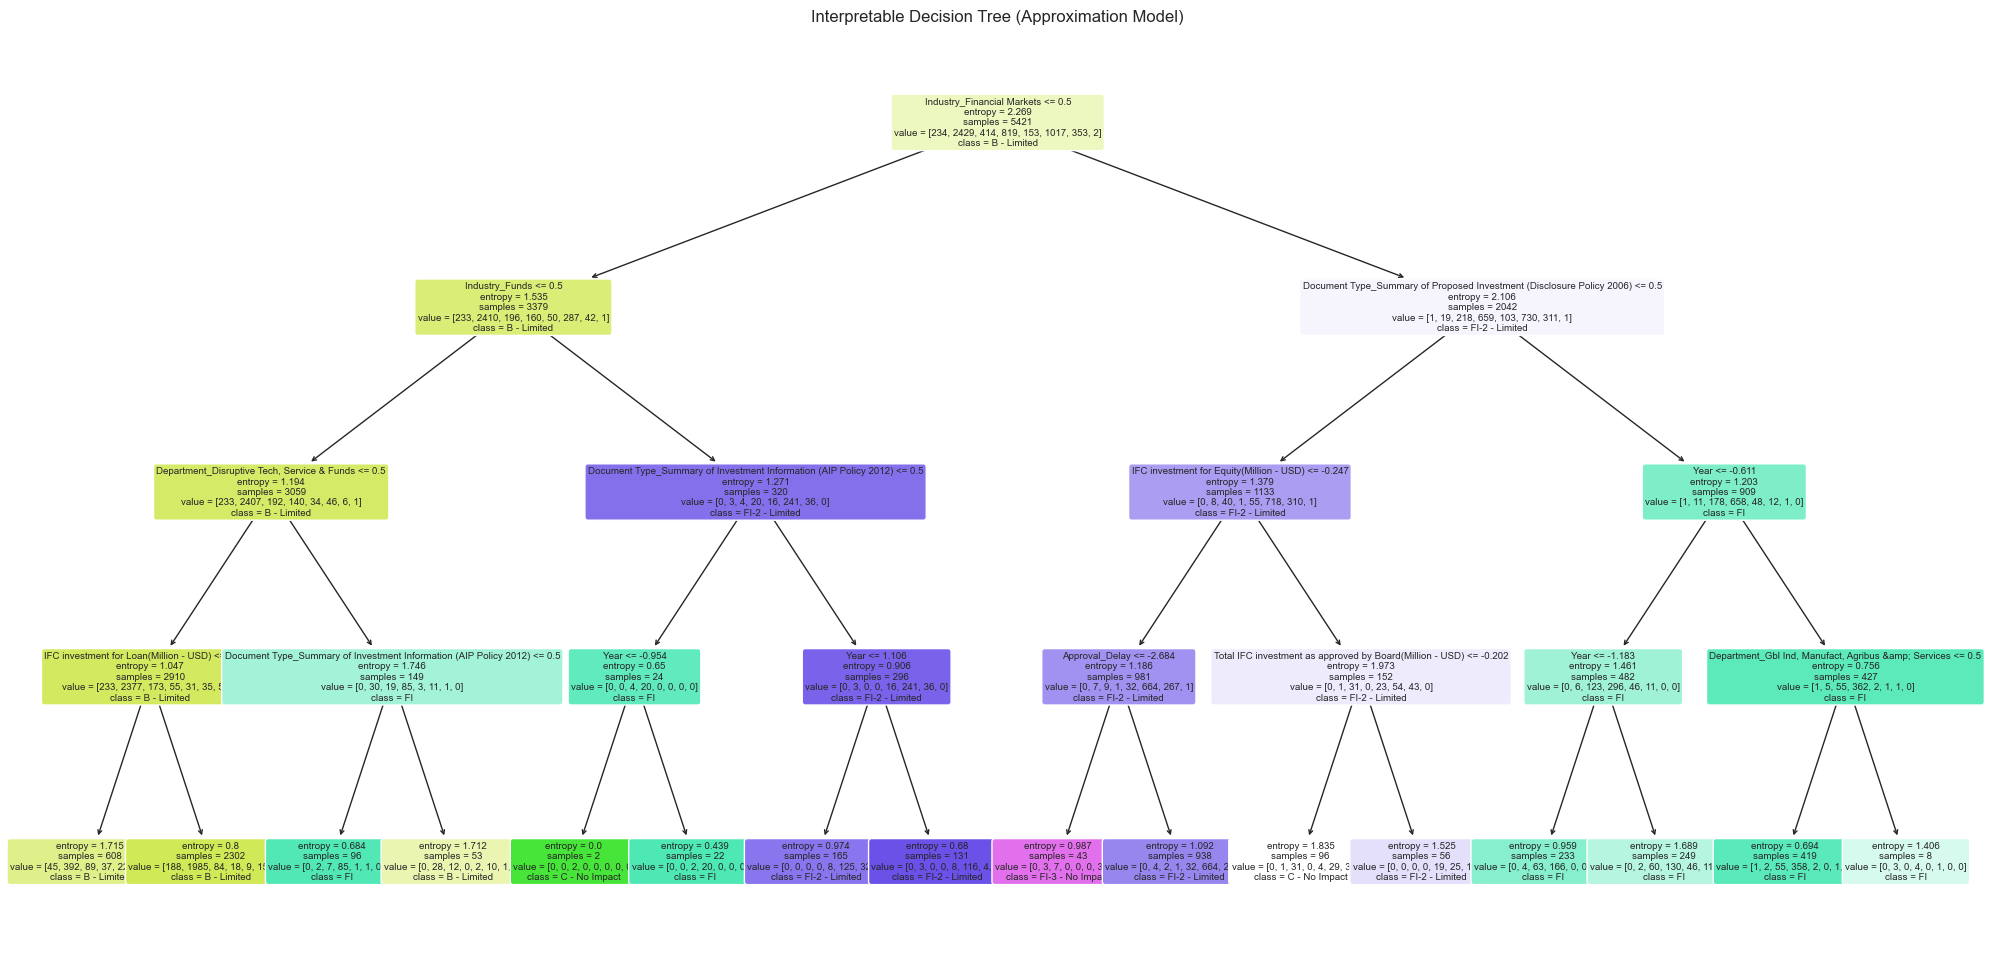

In [171]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 12))
plot_tree(
    dt_model,
    feature_names=all_feature_names,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=7
)
plt.title("Interpretable Decision Tree (Approximation Model)")
plt.show()


Total features in model: 601
Total feature names: 601


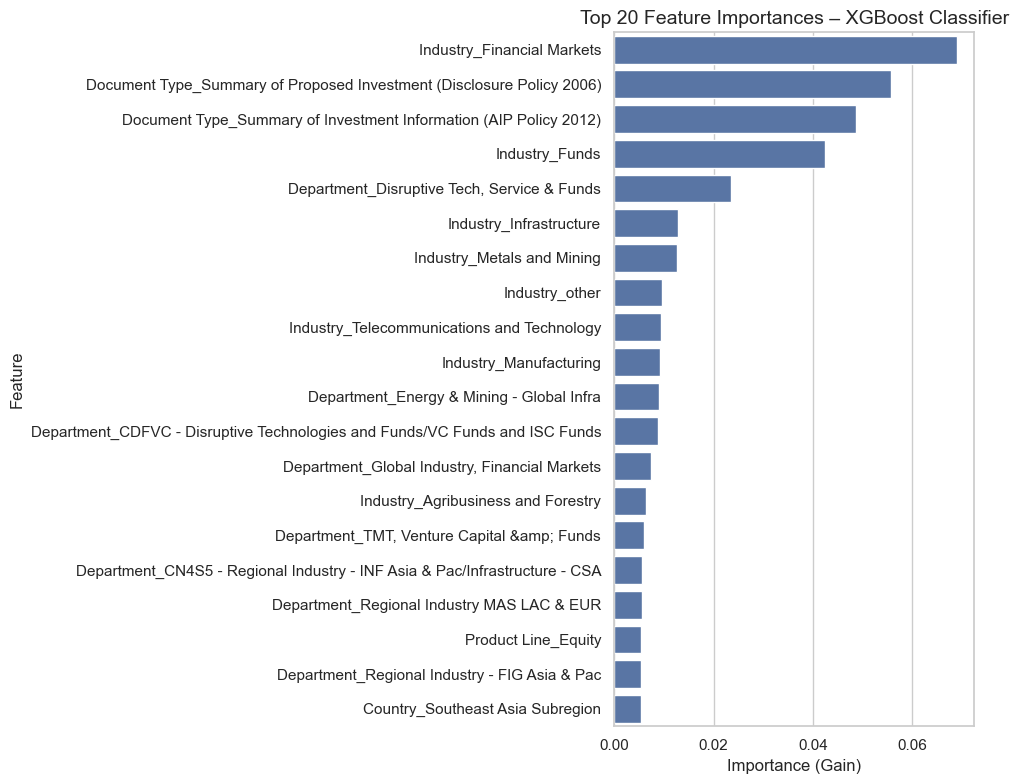

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Extract preprocessor and core XGBoost model from the pipeline
preprocess = xgb_clf.named_steps['preprocess']
xgb_core  = xgb_clf.named_steps['model']

# 2. Get feature names after preprocessing
# Numeric feature names (unchanged)
num_feature_names = np.array(numeric_features_clf)

# One-hot encoded categorical feature names
ohe = preprocess.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(categorical_features_clf)

# Combine into one array in the same order as the transformed matrix
all_feature_names = np.concatenate([num_feature_names, cat_feature_names])

# 3. Get feature importances from XGBoost
importances = xgb_core.feature_importances_

# Safety check
print("Total features in model:", len(importances))
print("Total feature names:", len(all_feature_names))

# 4. Take Top N most important features
N = 20
idx = np.argsort(importances)[::-1][:N]

top_importances = importances[idx]
top_features    = all_feature_names[idx]

# 5. Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_importances, y=top_features, orient='h')
plt.title("Top 20 Feature Importances – XGBoost Classifier", fontsize=14)
plt.xlabel("Importance (Gain)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [189]:

# Deployment ready refitting

In [142]:

from xgboost import XGBRegressor, XGBClassifier

# Your best regression model
xgb_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])
xgb_model.fit(X_train, y_train)   # y_train = regression target

# Your best classification model
xgb_clf = Pipeline(steps=[
    ('preprocess', clf_preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='mlogloss'
    ))
])
xgb_clf.fit(Xc_train, yc_train)   # yc_train = encoded classes




FileNotFoundError: [Errno 2] No such file or directory: 'C:\\ProgramData\\anaconda3\\envs\\hybrid_ml_investment\\Lib\\site-packages\\sklearn\\utils\\_repr_html\\estimator.js'

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\ProgramData\\anaconda3\\envs\\hybrid_ml_investment\\Lib\\site-packages\\sklearn\\utils\\_repr_html\\estimator.js'

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['IFC investment for '
                                                   'Loan(Million - USD)',
                                                   'IFC investment for '
                                                   'Equity(Million - USD)',
                                                   'Total IFC investment as '
                                                   'approved by Board(Million '
                                                   '- USD)',
                                                   'Approval_Delay',
                                                   'Signing_Delay',
                                                   'Invest_Delay']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                          

In [135]:

import joblib
import os

os.makedirs("models", exist_ok=True)

# Feature lists used for each model
reg_feature_cols = X_train.columns.tolist()
clf_feature_cols = Xc_train.columns.tolist()

# e.g. label_encoder instead of le
joblib.dump(xgb_model,        "models/reg_model.joblib")
joblib.dump(xgb_clf,          "models/clf_model.joblib")
joblib.dump(le,               "models/label_encoder.joblib")
joblib.dump(reg_feature_cols, "models/reg_feature_cols.joblib")
joblib.dump(clf_feature_cols, "models/clf_feature_cols.joblib")

print("Saved:")
print(" models/reg_model.joblib")
print(" models/clf_model.joblib")
print(" models/label_encoder.joblib")
print(" models/reg_feature_cols.joblib")
print(" models/clf_feature_cols.joblib")


Saved:
 models/reg_model.joblib
 models/clf_model.joblib
 models/label_encoder.joblib
 models/reg_feature_cols.joblib
 models/clf_feature_cols.joblib


In [125]:
%whos






Variable                   Type                      Data/Info
--------------------------------------------------------------
ColumnTransformer          ABCMeta                   <class 'sklearn.compose._<...>ormer.ColumnTransformer'>
DecisionTreeClassifier     ABCMeta                   <class 'sklearn.tree._cla<...>.DecisionTreeClassifier'>
LabelEncoder               type                      <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
LinearRegression           ABCMeta                   <class 'sklearn.linear_mo<...>._base.LinearRegression'>
LogisticRegression         type                      <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
N                          int                       20
OneHotEncoder              type                      <class 'sklearn.preproces<...>_encoders.OneHotEncoder'>
Pipeline                   ABCMeta                   <class 'sklearn.pipeline.Pipeline'>
RandomForestClassifier     ABCMeta                   <class 'sklearn.ensemb

xgb_search                 RandomizedSearchCV        RandomizedSearchCV(cv=Str<...>'f1_weighted', verbose=2)
y                          Series                    0        1.03\n1       76<...>gth: 6777, dtype: float64
y_clf                      Series                    0       FI-3 - No Impact\<...>ngth: 6777, dtype: object
y_clf_encoded              ndarray                   6777: 6777 elems, type `int32`, 27108 bytes
y_test                     Series                    6346      6.00\n3715     <...>gth: 1356, dtype: float64
y_train                    Series                    808       5.00\n6620     <...>gth: 5421, dtype: float64
yc_test                    ndarray                   1356: 1356 elems, type `int32`, 5424 bytes
yc_train                   ndarray                   5421: 5421 elems, type `int32`, 21684 bytes


In [127]:
# Rebuild df_ifc from df_clean again to be safe
df_ifc = df_clean.copy()

# Ensure targets present
if target not in df_ifc.columns:
    df_ifc[target] = y

if clf_target not in df_ifc.columns:
    df_ifc[clf_target] = y_clf

# 1) If EnvCatShort is missing, derive it from Environmental Category
if "EnvCatShort" not in df_ifc.columns:
    env_map = {
        "A - Significant": "A",
        "B - Limited": "B",
        "C - No Impact": "C",
        "FI": "FI",
        "FI-1 - Significant": "FI-1",
        "FI-2 - Limited": "FI-2",
        "FI-3 - No Impact": "FI-3",
        "Other": "O"
    }
    df_ifc["EnvCatShort"] = df_ifc["Environmental Category"].map(env_map)

# 2) Re-check missing features
missing_reg = [c for c in reg_feature_cols if c not in df_ifc.columns]
missing_clf = [c for c in clf_feature_cols if c not in df_ifc.columns]

print("Missing regression features in df_ifc:", missing_reg)
print("Missing classification features in df_ifc:", missing_clf)



Missing regression features in df_ifc: []
Missing classification features in df_ifc: []


In [128]:
import os

os.makedirs("data", exist_ok=True)
csv_path = "data/ifc_clean.csv"
df_ifc.to_csv(csv_path, index=False, encoding="utf-8-sig")
print("Saved:", csv_path)
print("Final shape:", df_ifc.shape)



Saved: data/ifc_clean.csv
Final shape: (6777, 23)


In [134]:

cols_for_sliders = {
    "IFC investment for Loan(Million - USD)": "Loan Amount",
    "IFC investment for Equity(Million - USD)": "Equity Amount",
}

rows = []
for col, nice_name in cols_for_sliders.items():
    s = df[col].dropna()

    rows.append({
        "Column": nice_name,
        "df_name": col,
        "Min": s.min(),
        "P1": s.quantile(0.01),
        "P5": s.quantile(0.05),
        "Median": s.median(),
        "P95": s.quantile(0.95),
        "P99": s.quantile(0.99),
        "Max": s.max(),
    })

slider_stats = pd.DataFrame(rows)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")
slider_stats


,Column,df_name,Min,P1,P5,Median,P95,P99,Max
0,Loan Amount,IFC investment for Loan(Million - USD),0.00,0.00,1.09,25.00,154.99,316.66,"3,115.00"
1,Equity Amount,IFC investment for Equity(Million - USD),0.00,0.00,0.00,10.00,99.36,250.00,"1,003.00"


['Date Disclosed', 'Document Type', 'Product Line', 'Country', 'IFC Country Code', 'Industry', 'Environmental Category', 'Department', 'Status', 'Projected Board Date', 'IFC investment for Loan(Million - USD)', 'IFC investment for Equity(Million - USD)', 'Total IFC investment as approved by Board(Million - USD)', 'WB Country Code', 'As of Date', 'IFC Approval Date', 'IFC Invested Date', 'IFC Signed Date', 'Year', 'Approval_Delay', 'Signing_Delay', 'Invest_Delay']


In [199]:
# testing

In [139]:
!pip install scikit-learn==1.4.2






     ---------------------------------------- 10.6/10.6 MB 4.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.2
    Uninstalling scikit-learn-1.7.2:
      Successfully uninstalled scikit-learn-1.7.2


In [140]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\programdata\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, imbalanced-learn, scikit-learn-intelex, shap
